서울특별시
         time location  PM2.5
0     2015.01    서울특별시     25
11    2015.02    서울특별시     30
22    2015.03    서울특별시     30
33    2015.04    서울특별시     21
44    2015.05    서울특별시     22
...       ...      ...    ...
1236  2021.06    서울특별시     19
1253  2021.07    서울특별시     15
1270  2021.08    서울특별시     13
1287  2021.09    서울특별시      7
1304  2021.10    서울특별시     13

[82 rows x 3 columns]
대구광역시
         time location  PM2.5
2     2015.01    대구광역시     33
13    2015.02    대구광역시     33
24    2015.03    대구광역시     29
35    2015.04    대구광역시     22
46    2015.05    대구광역시     25
...       ...      ...    ...
1238  2021.06    대구광역시     20
1255  2021.07    대구광역시     10
1272  2021.08    대구광역시     11
1289  2021.09    대구광역시      9
1306  2021.10    대구광역시     15

[82 rows x 3 columns]
인천광역시
         time location  PM2.5
3     2015.01    인천광역시     31
14    2015.02    인천광역시     33
25    2015.03    인천광역시     31
36    2015.04    인천광역시     30
47    2015.05    인천광역시     28
...       ...      ...    ...
1239  

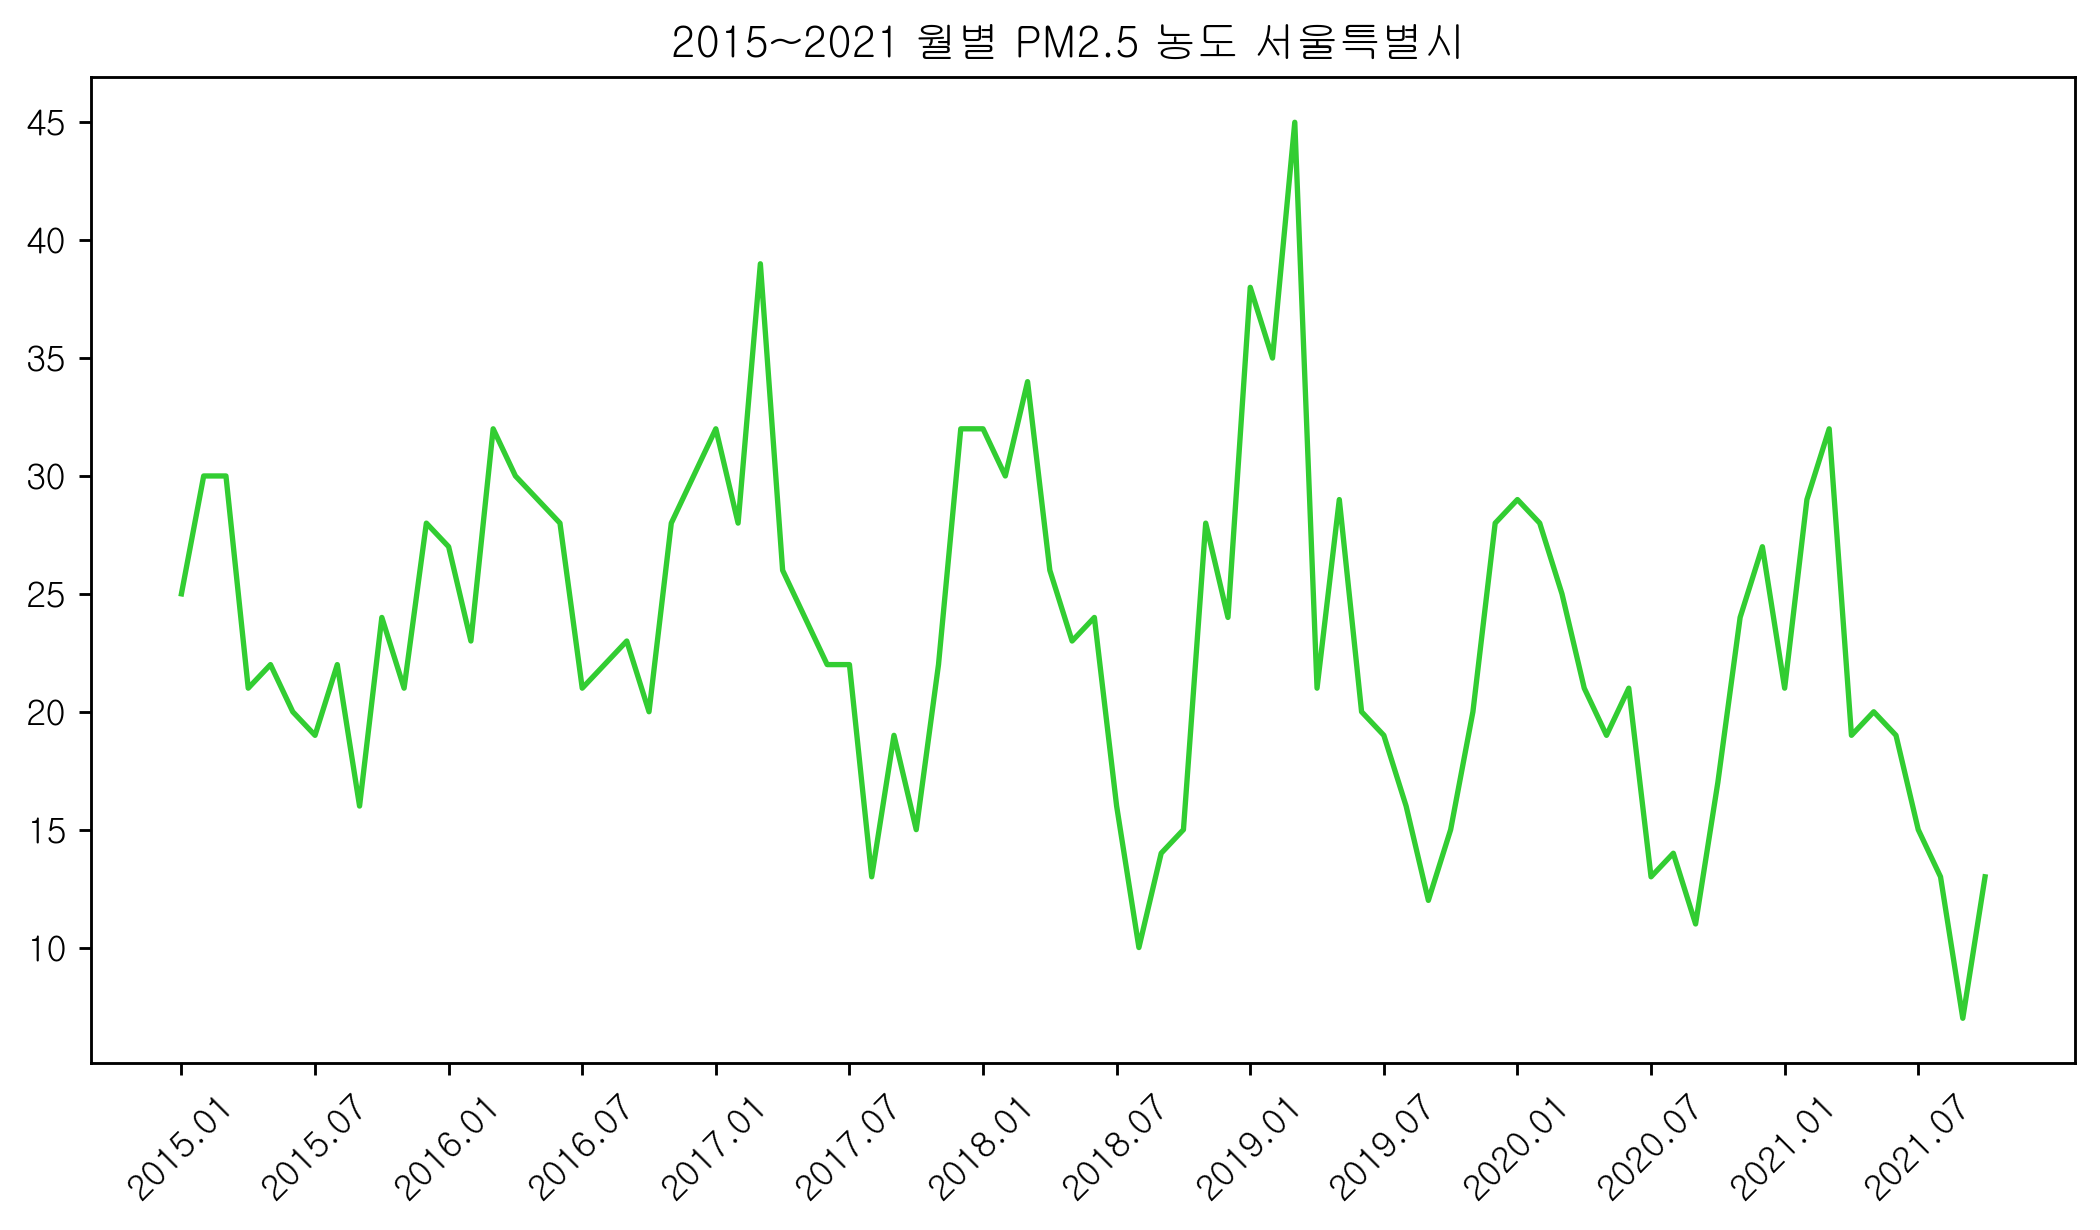

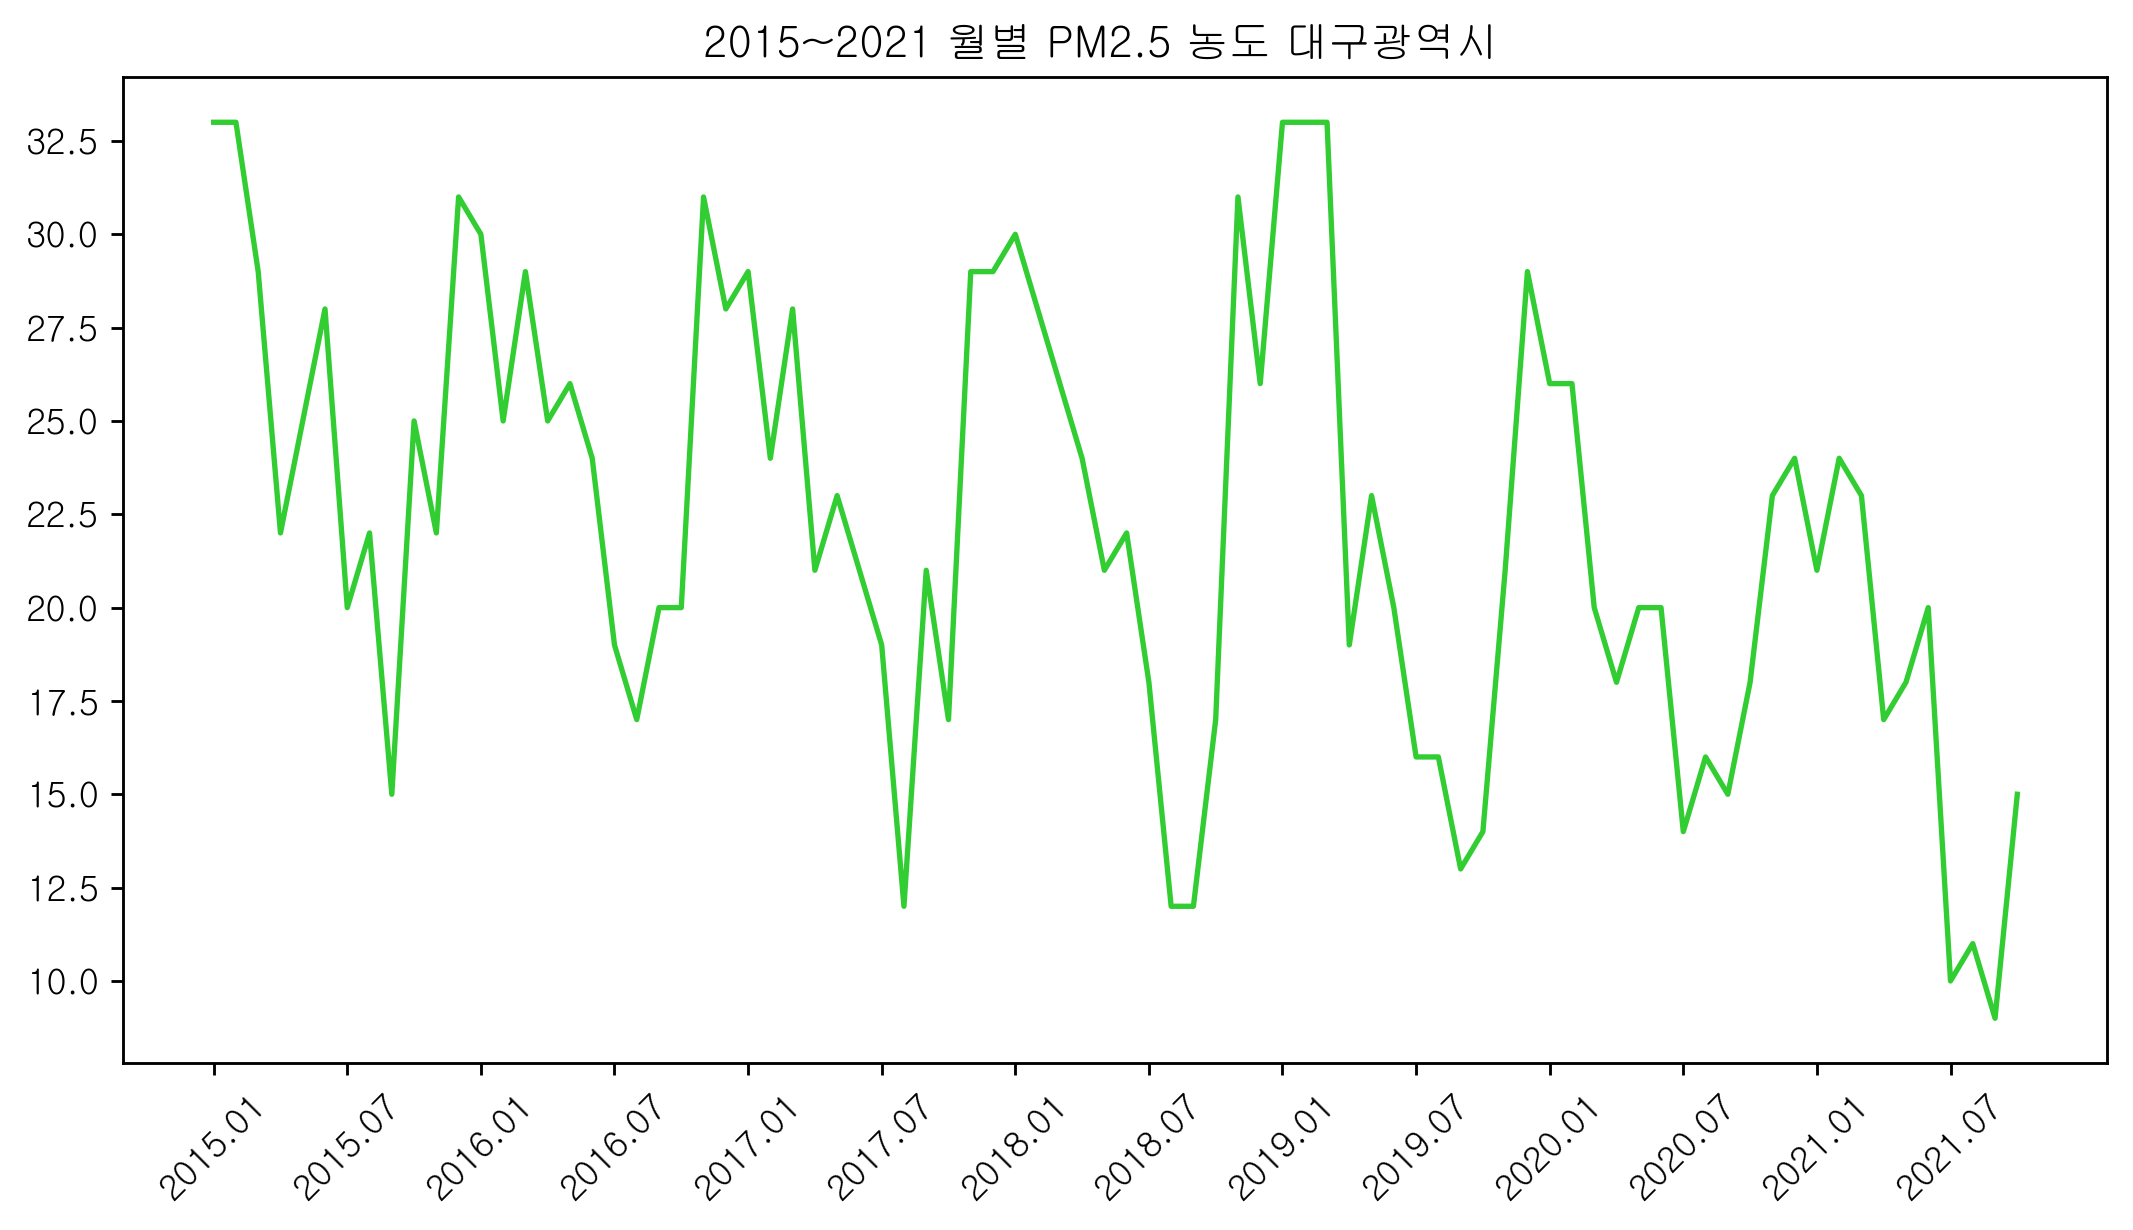

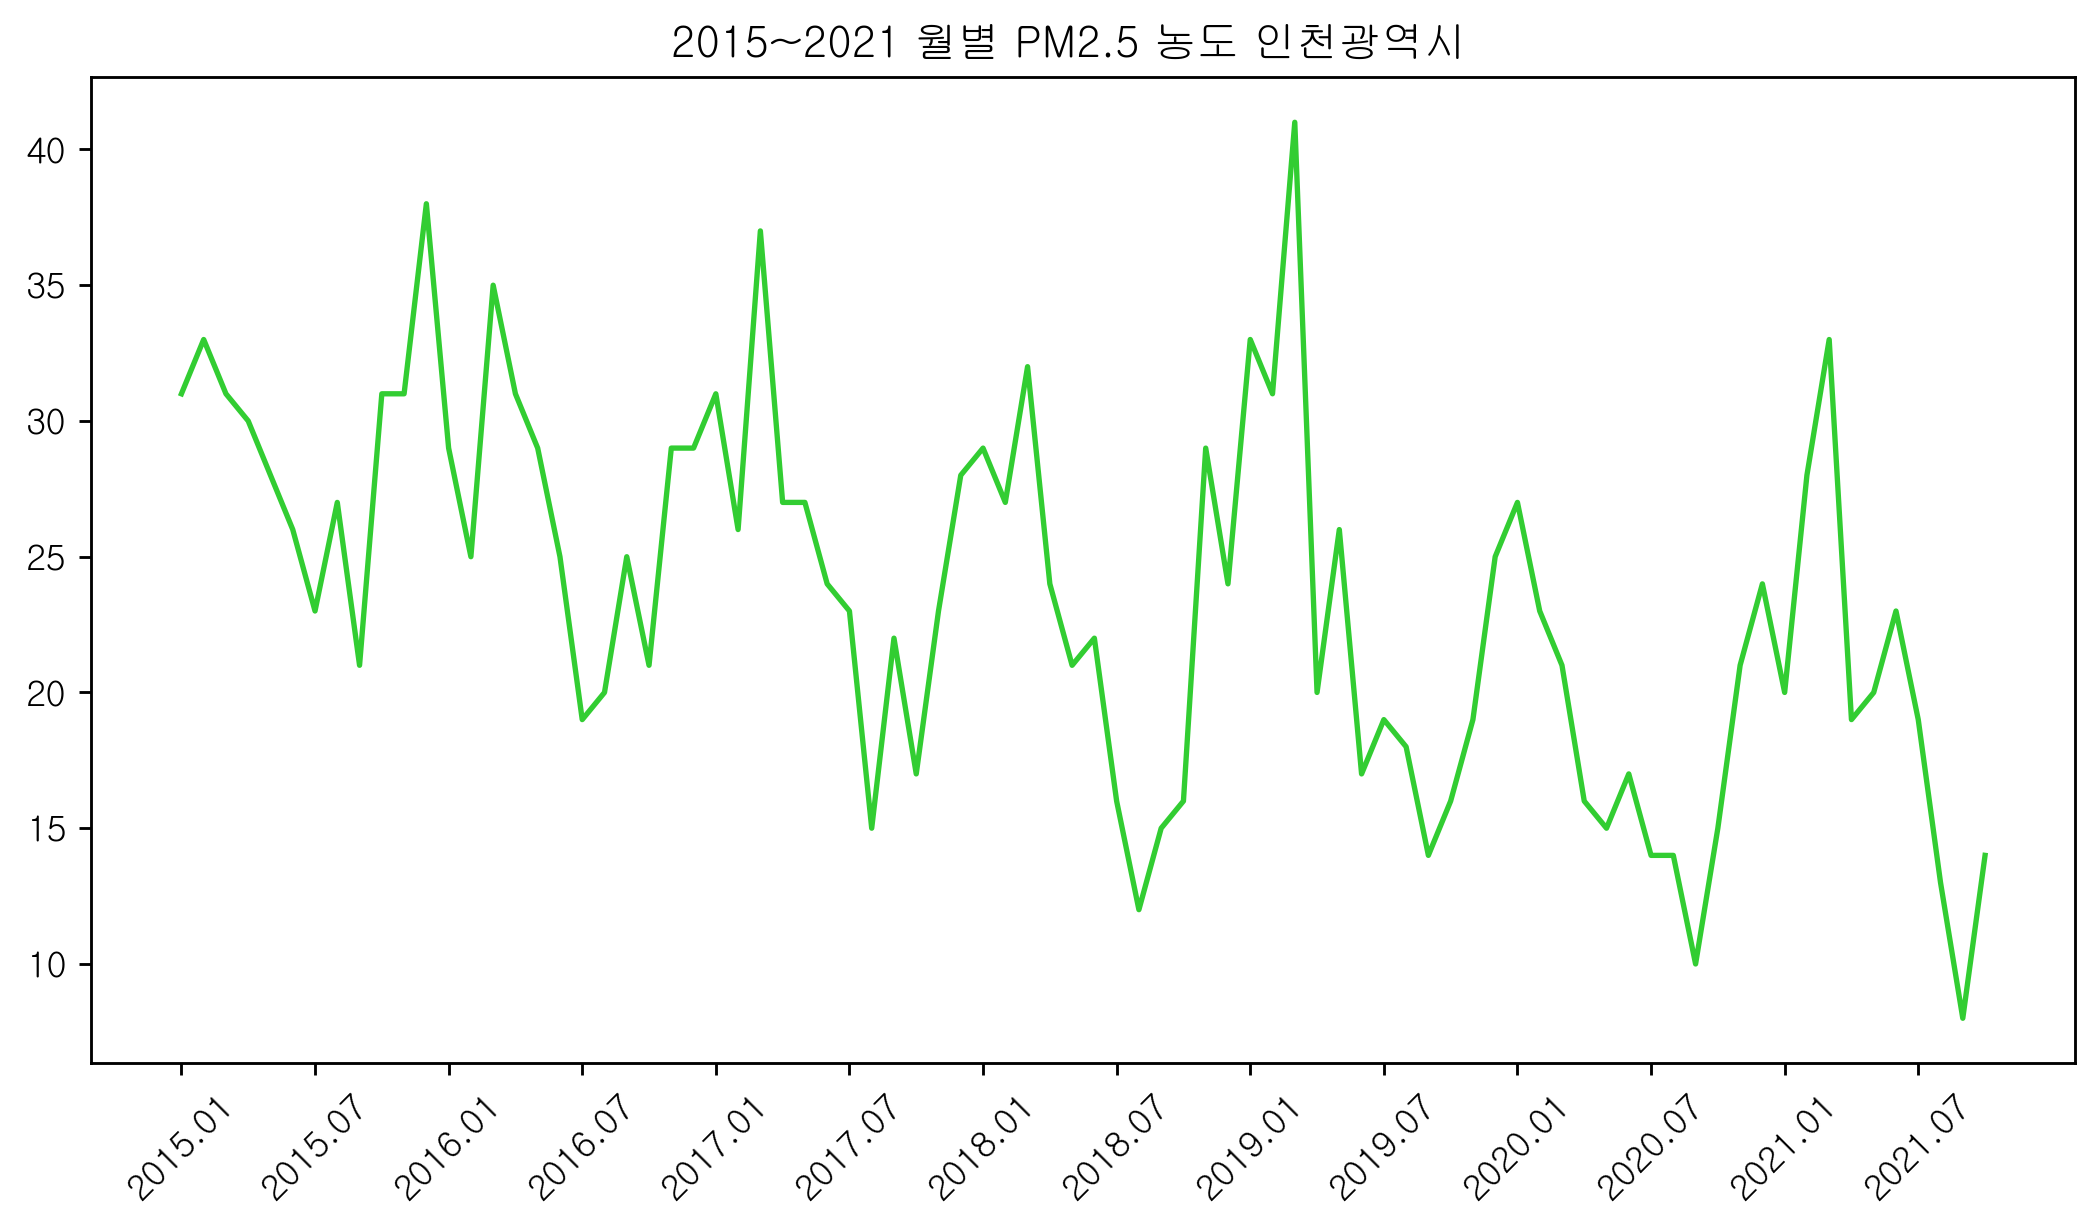

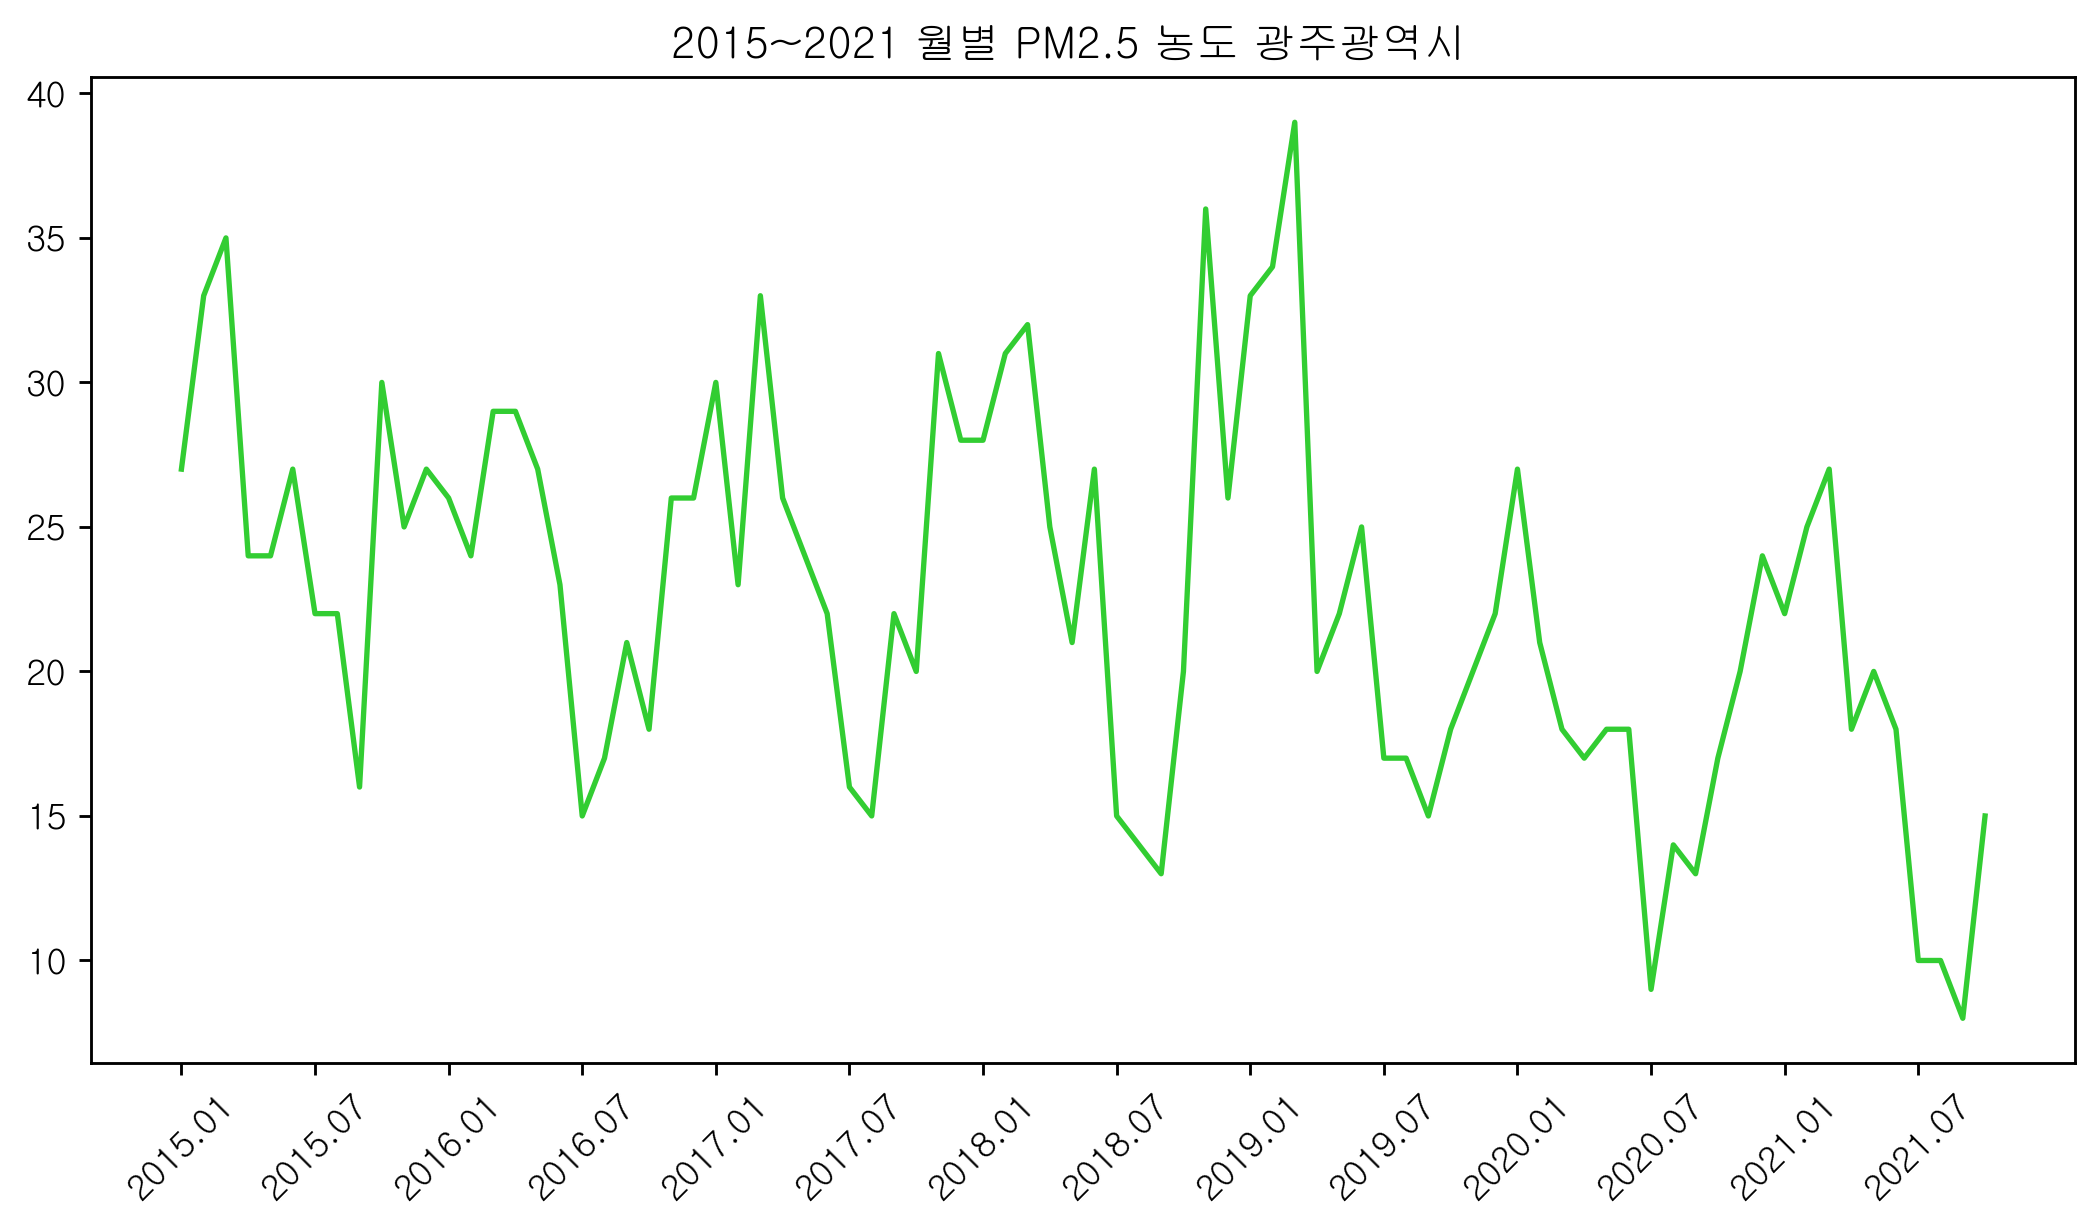

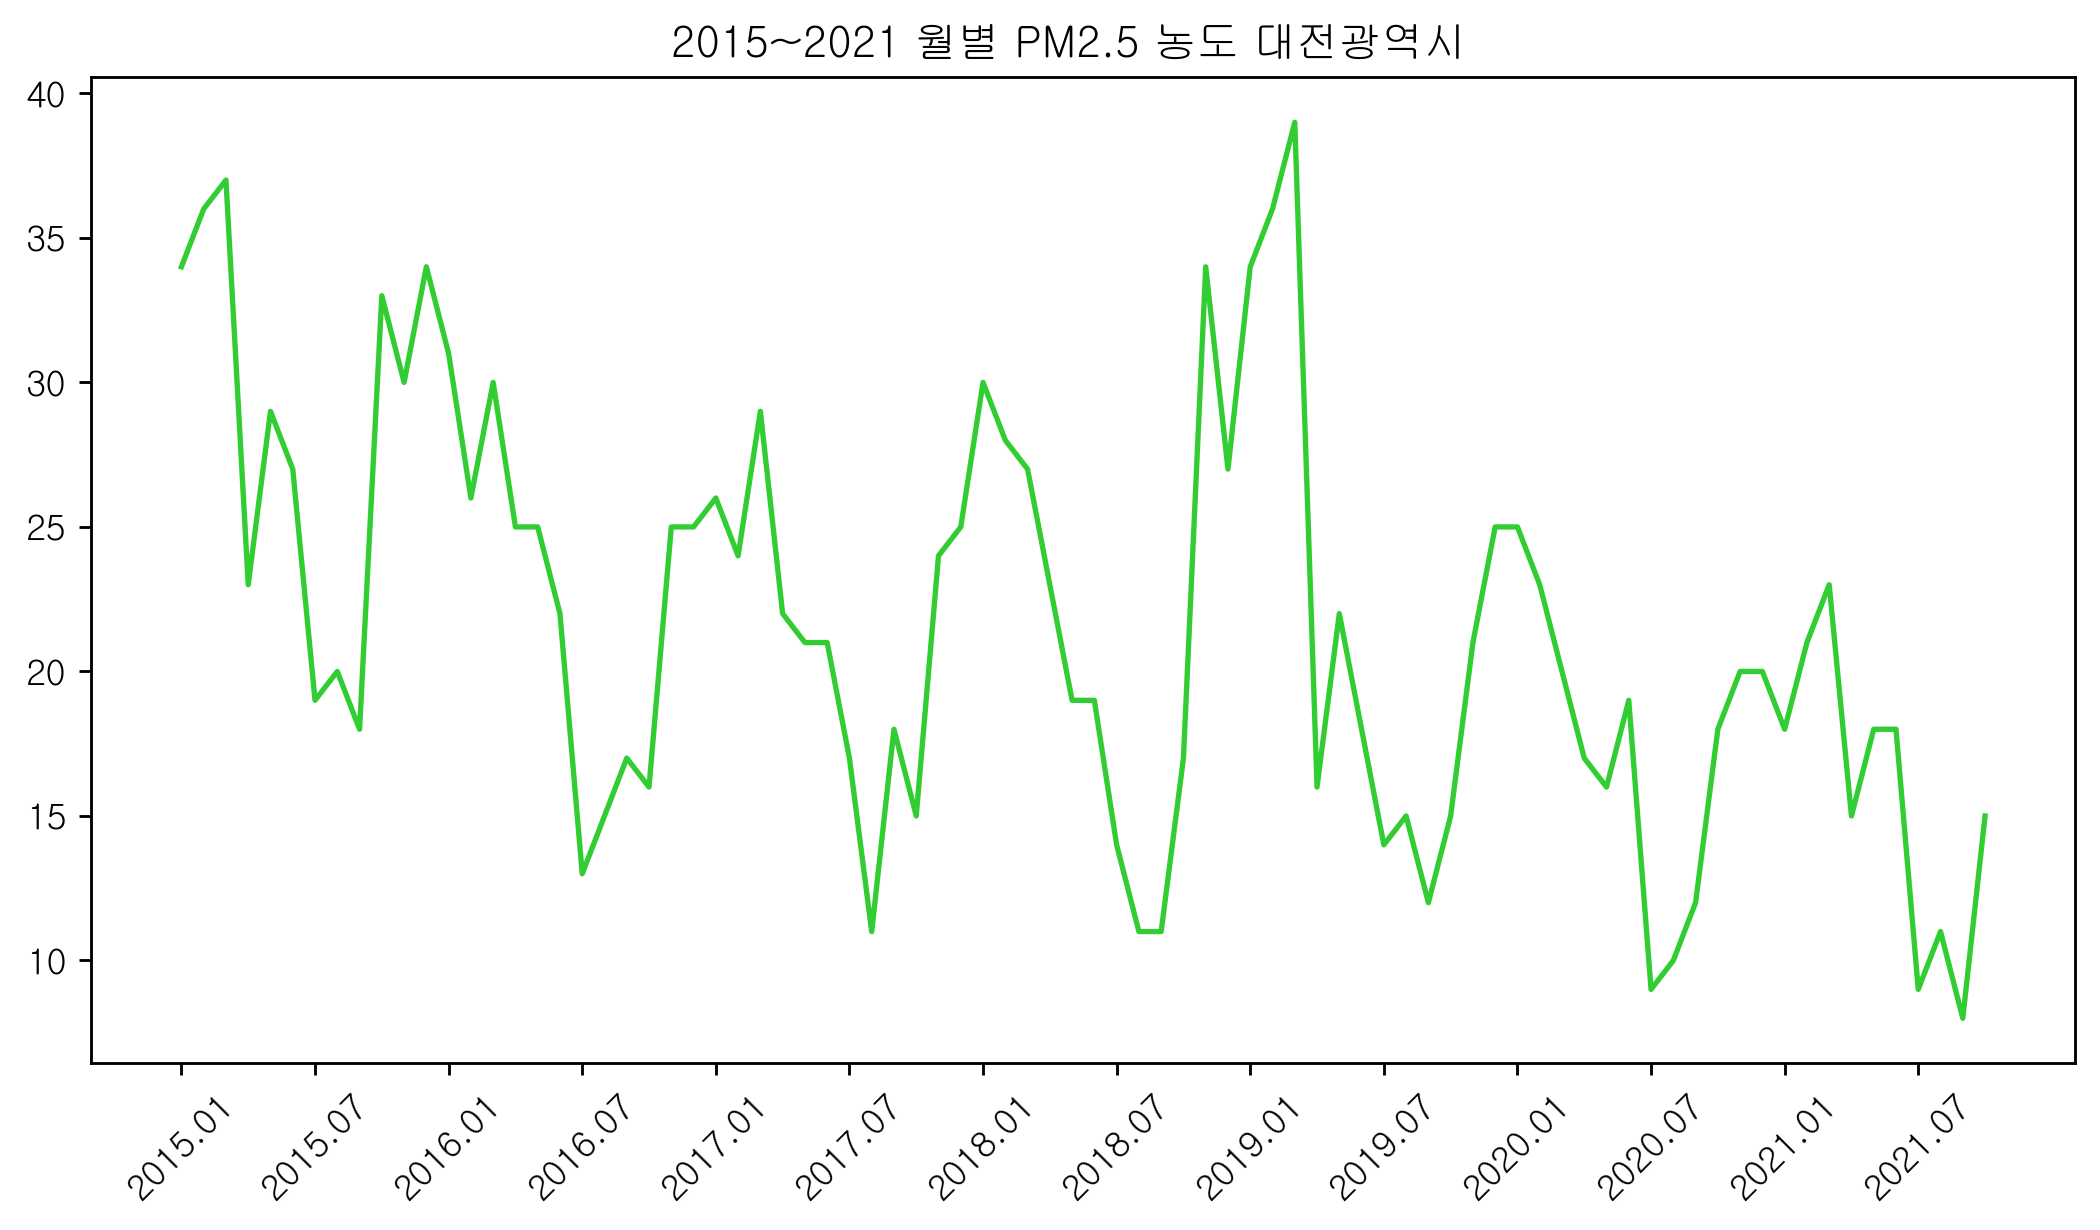

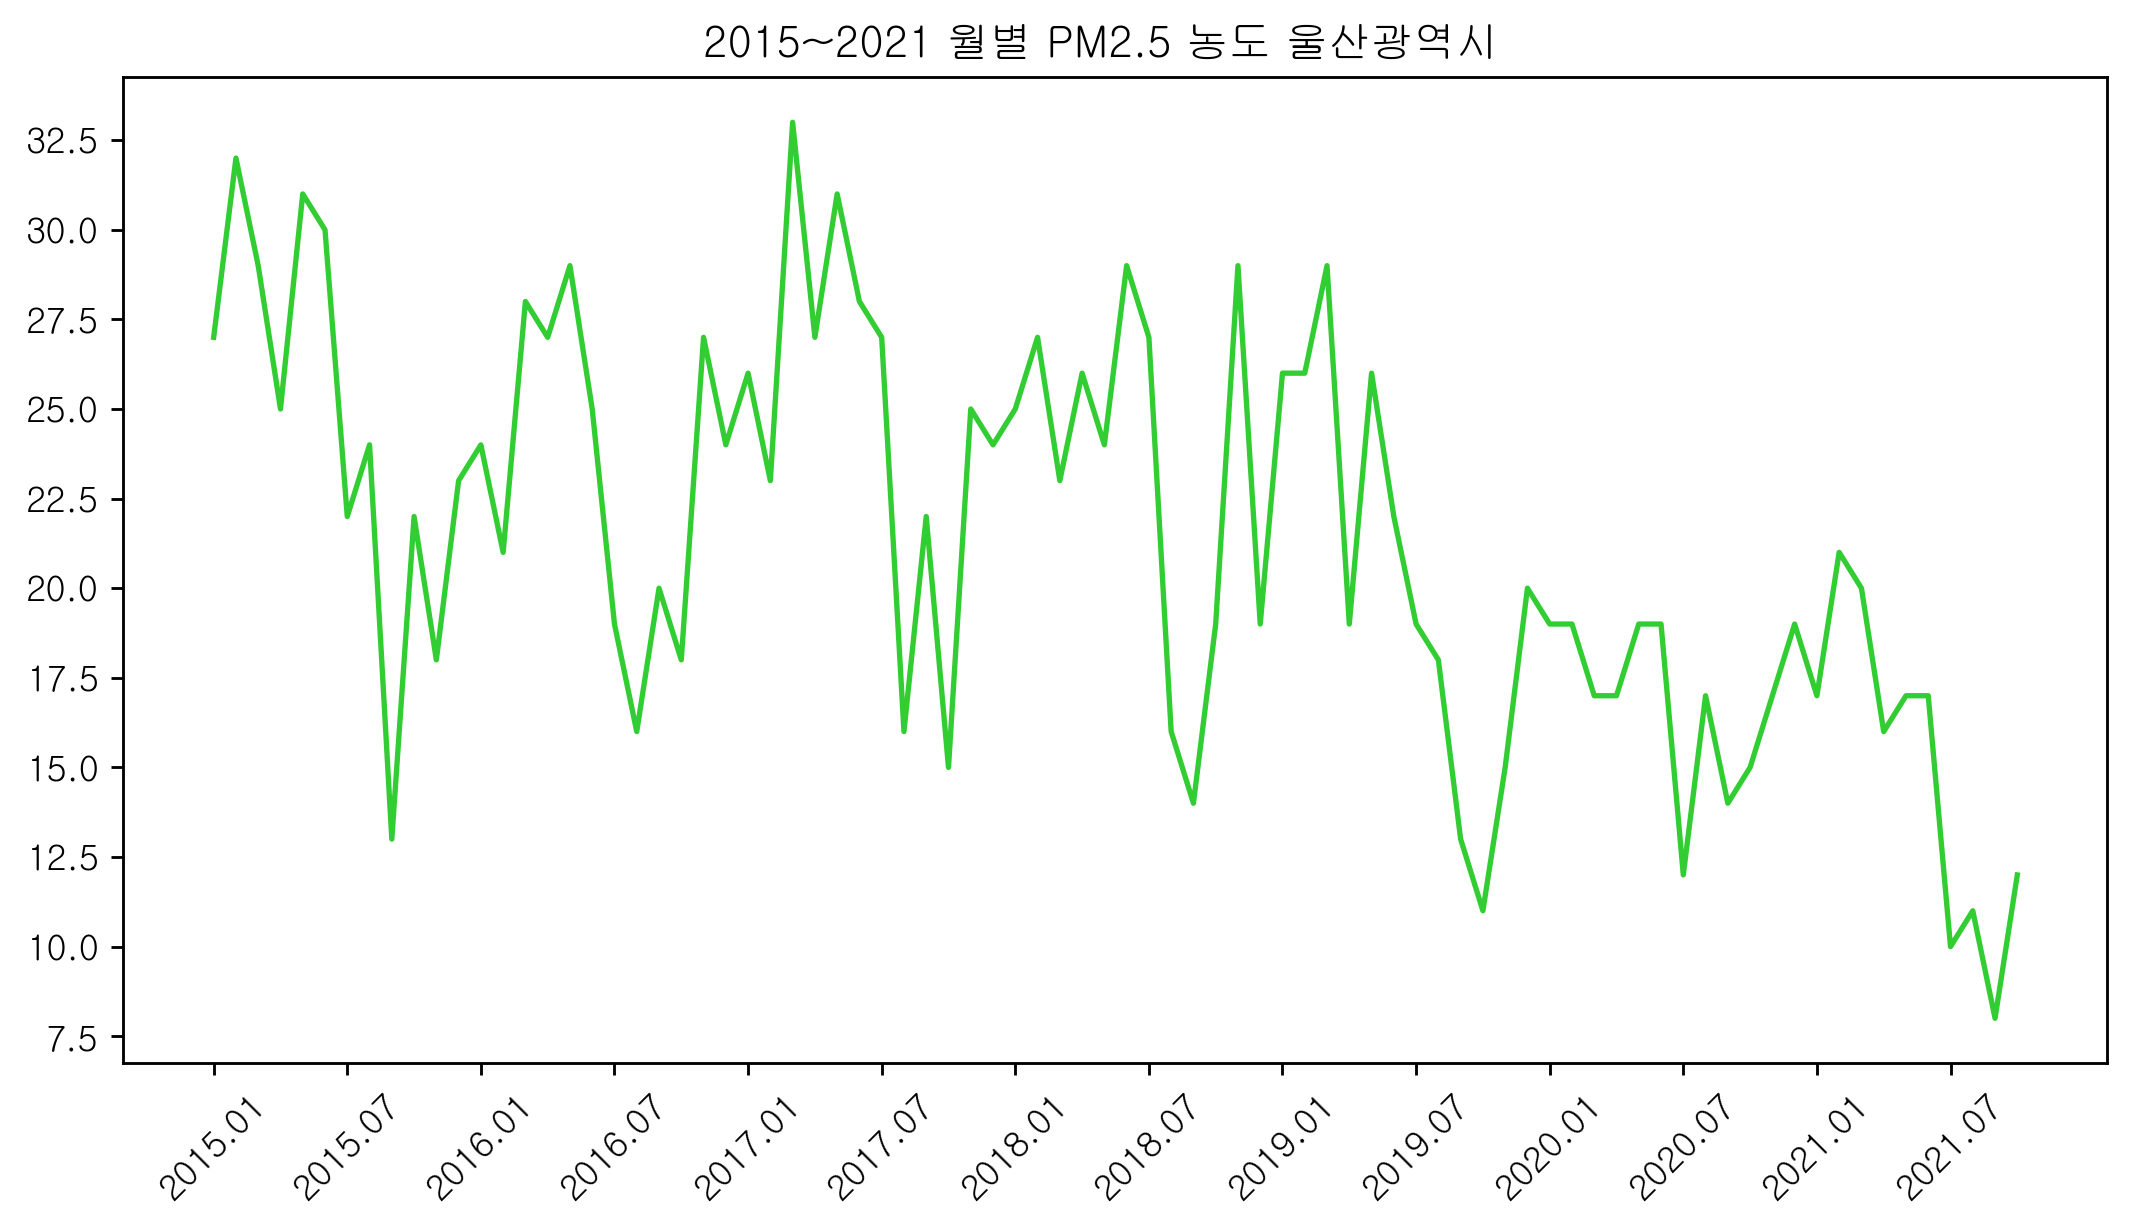

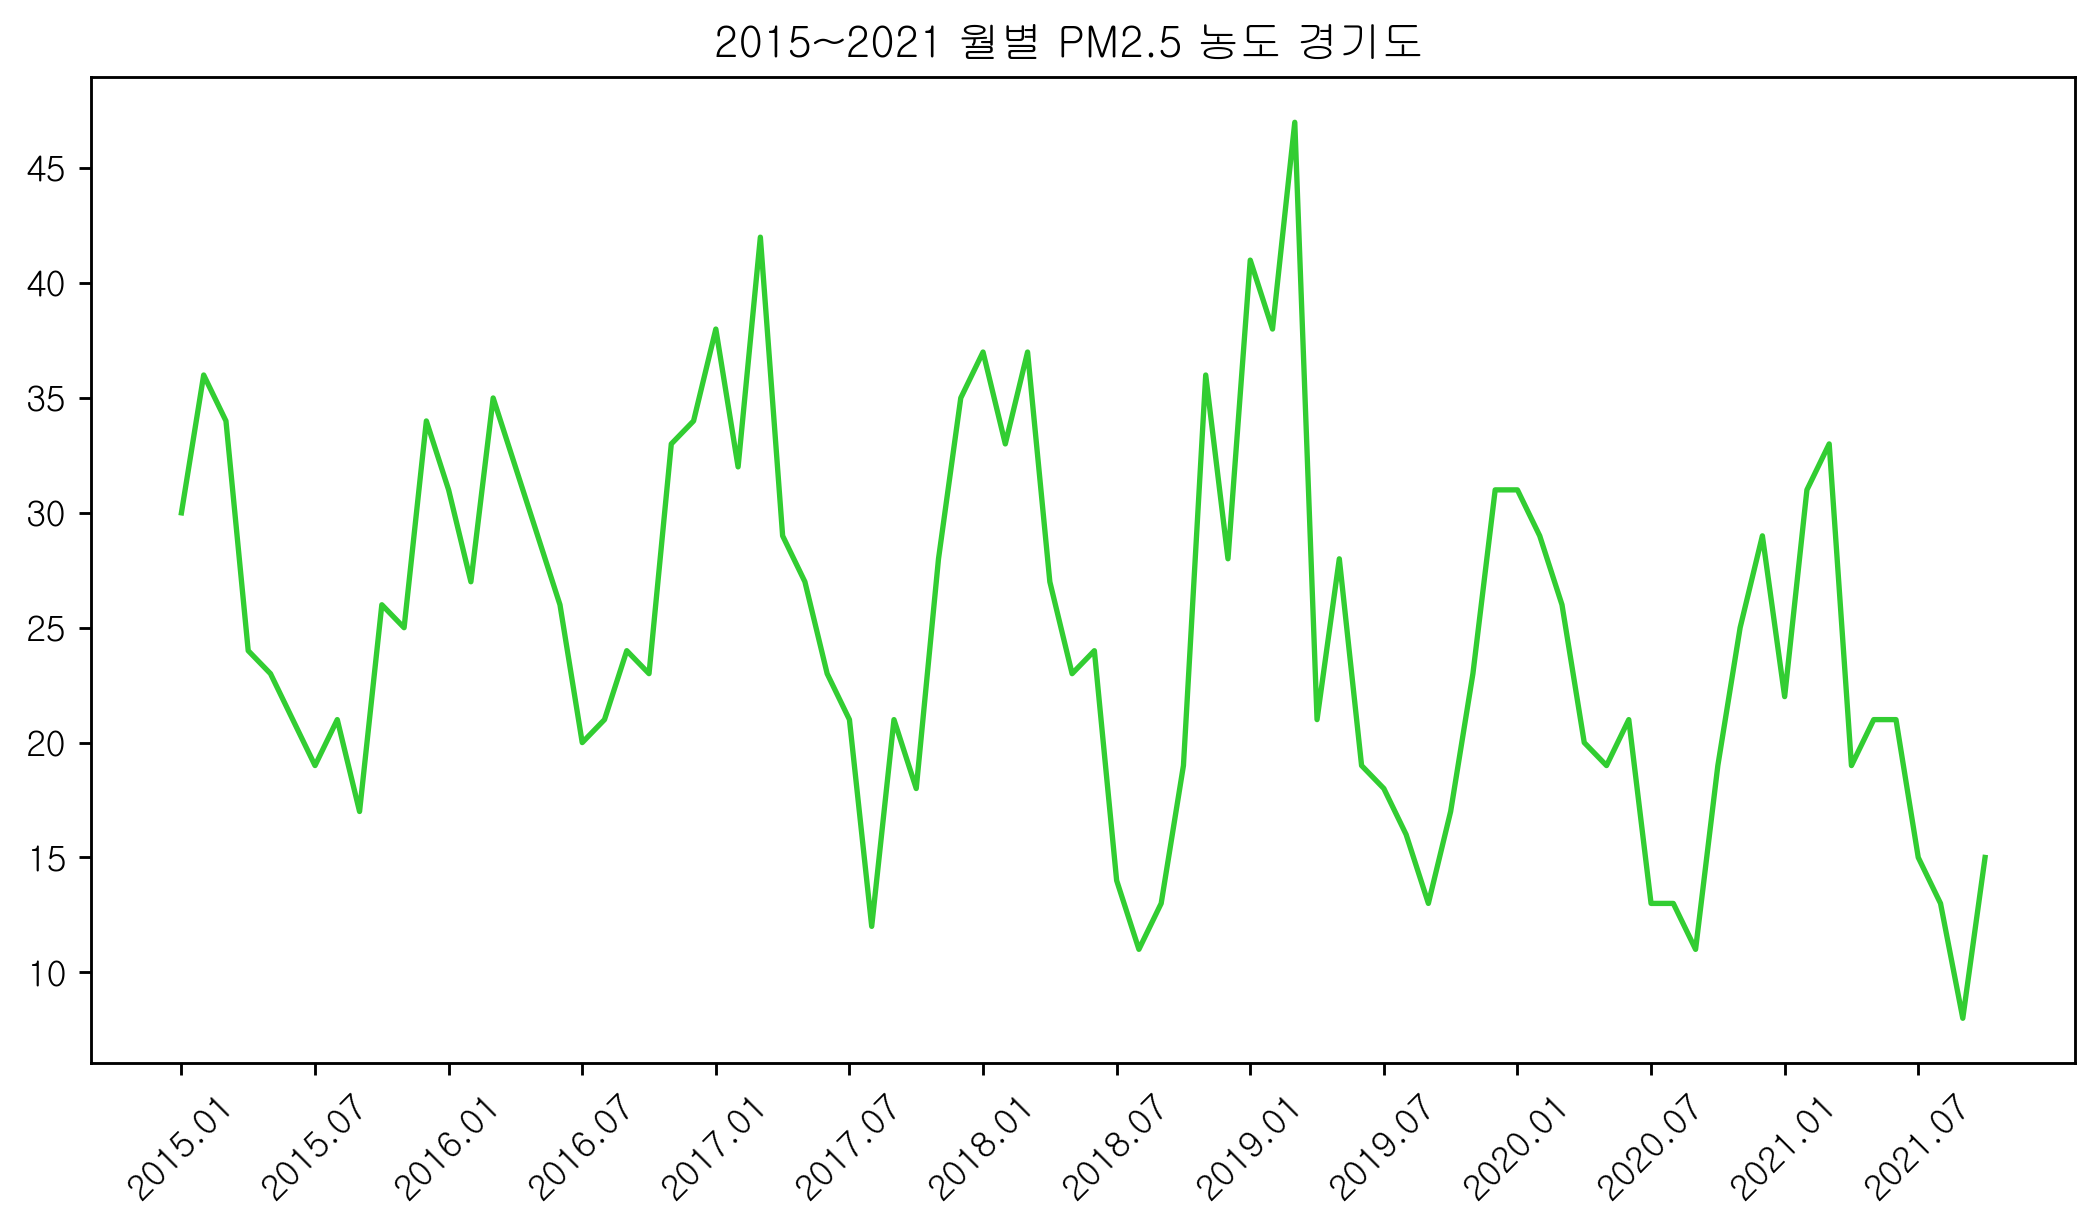

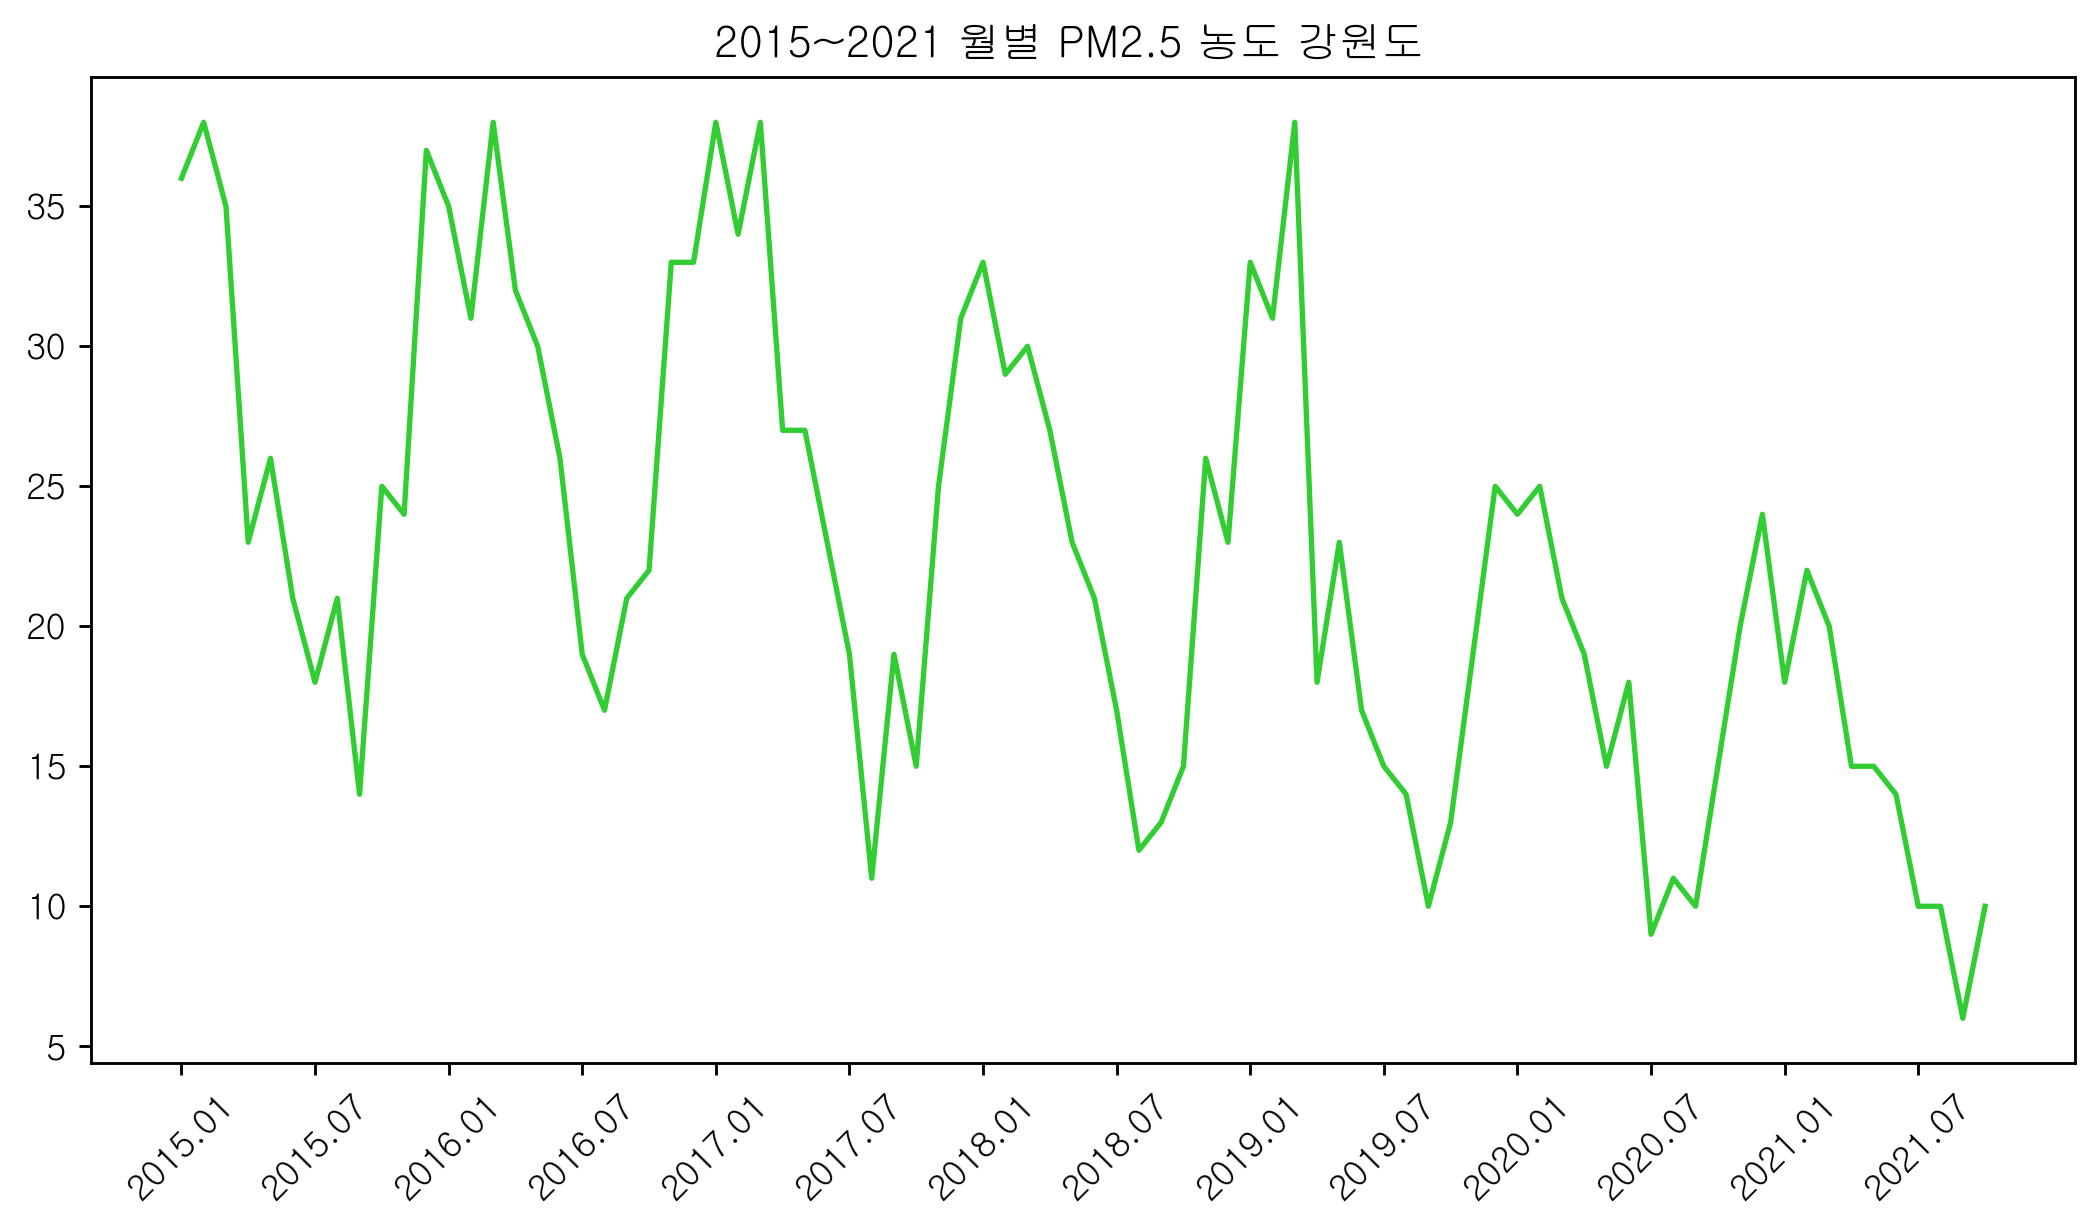

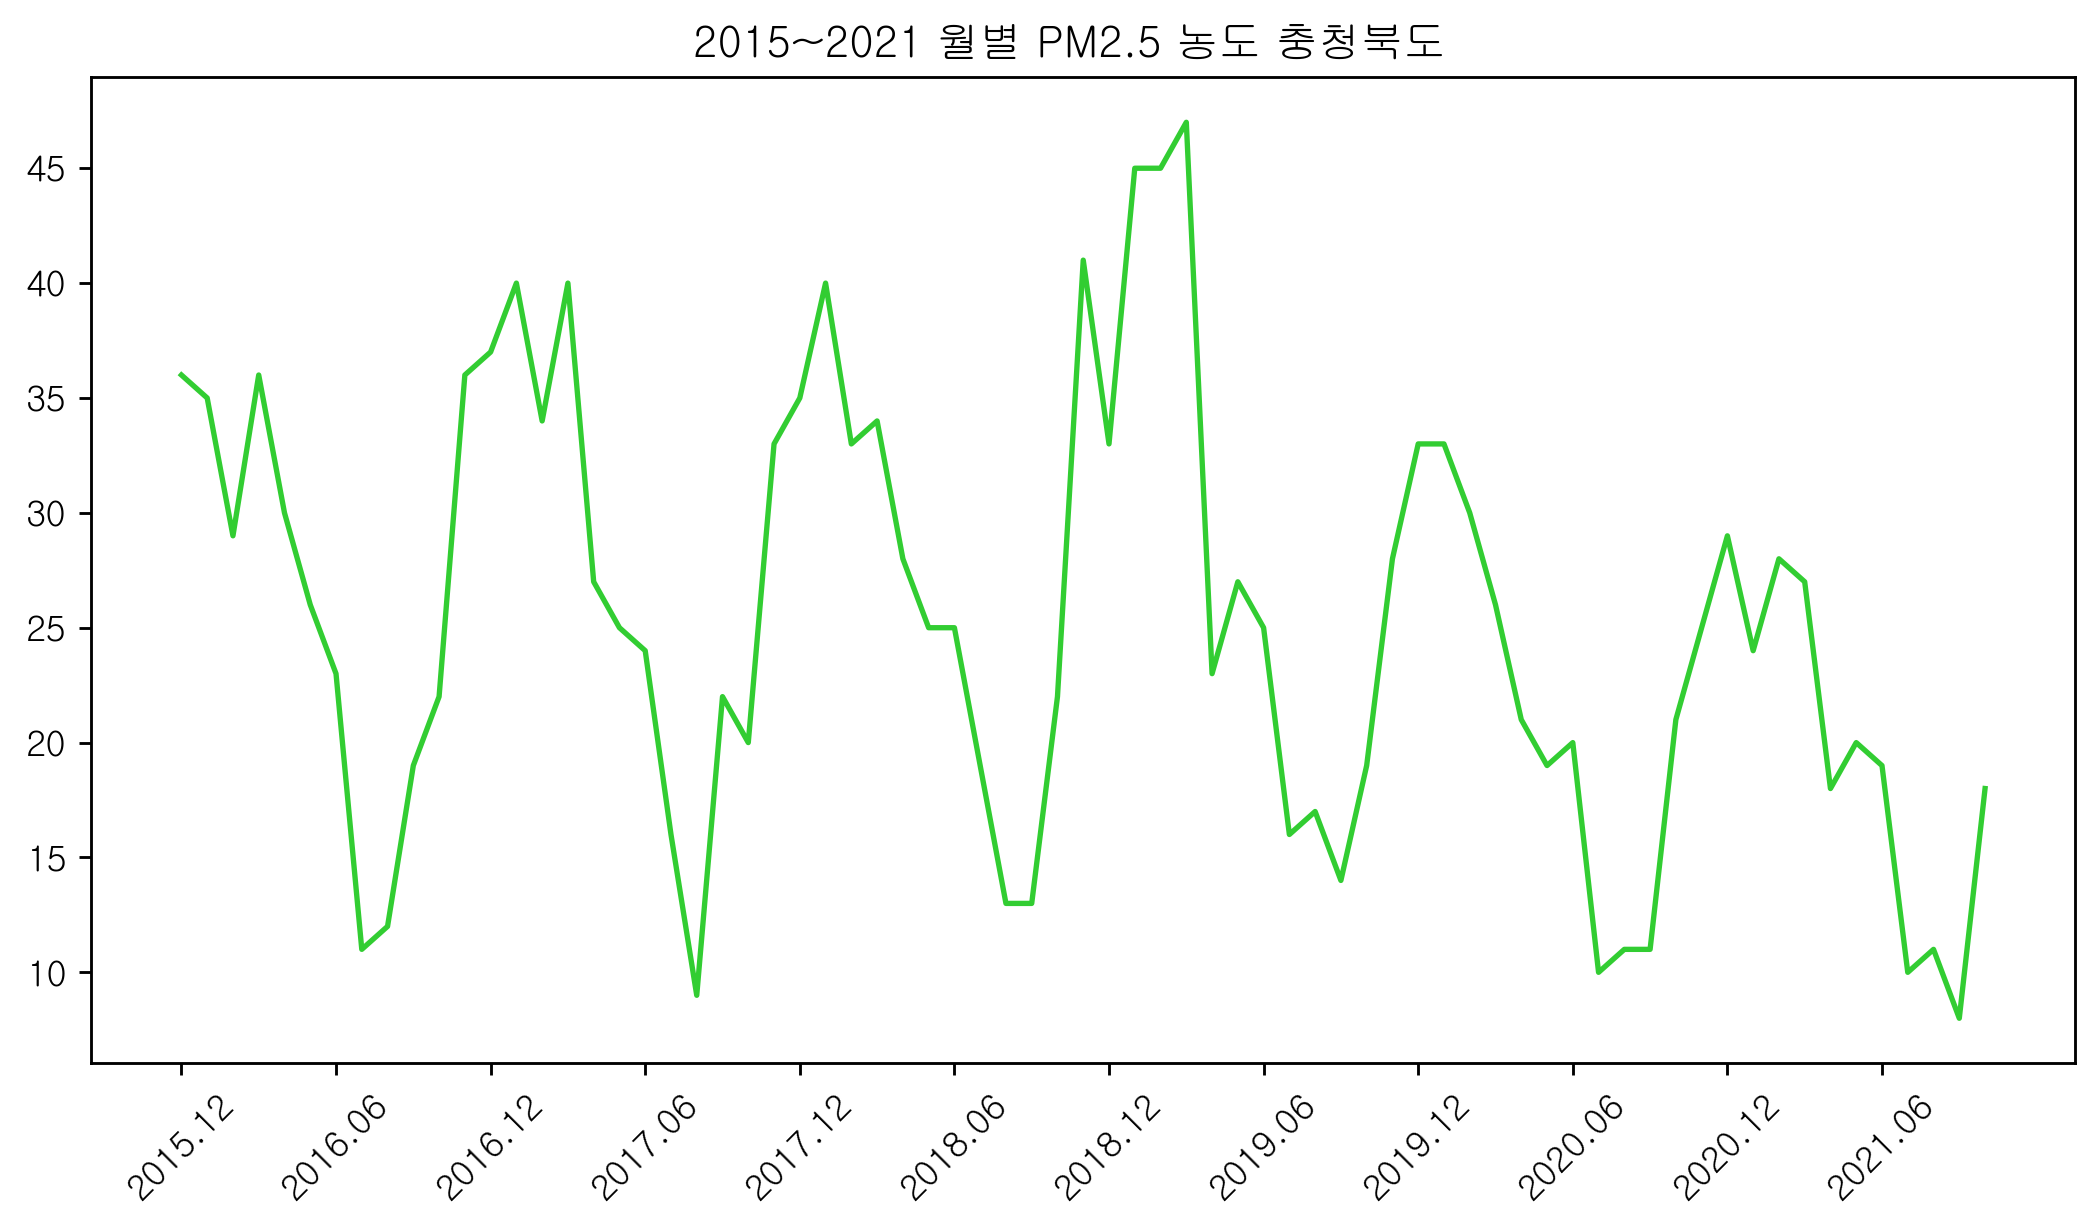

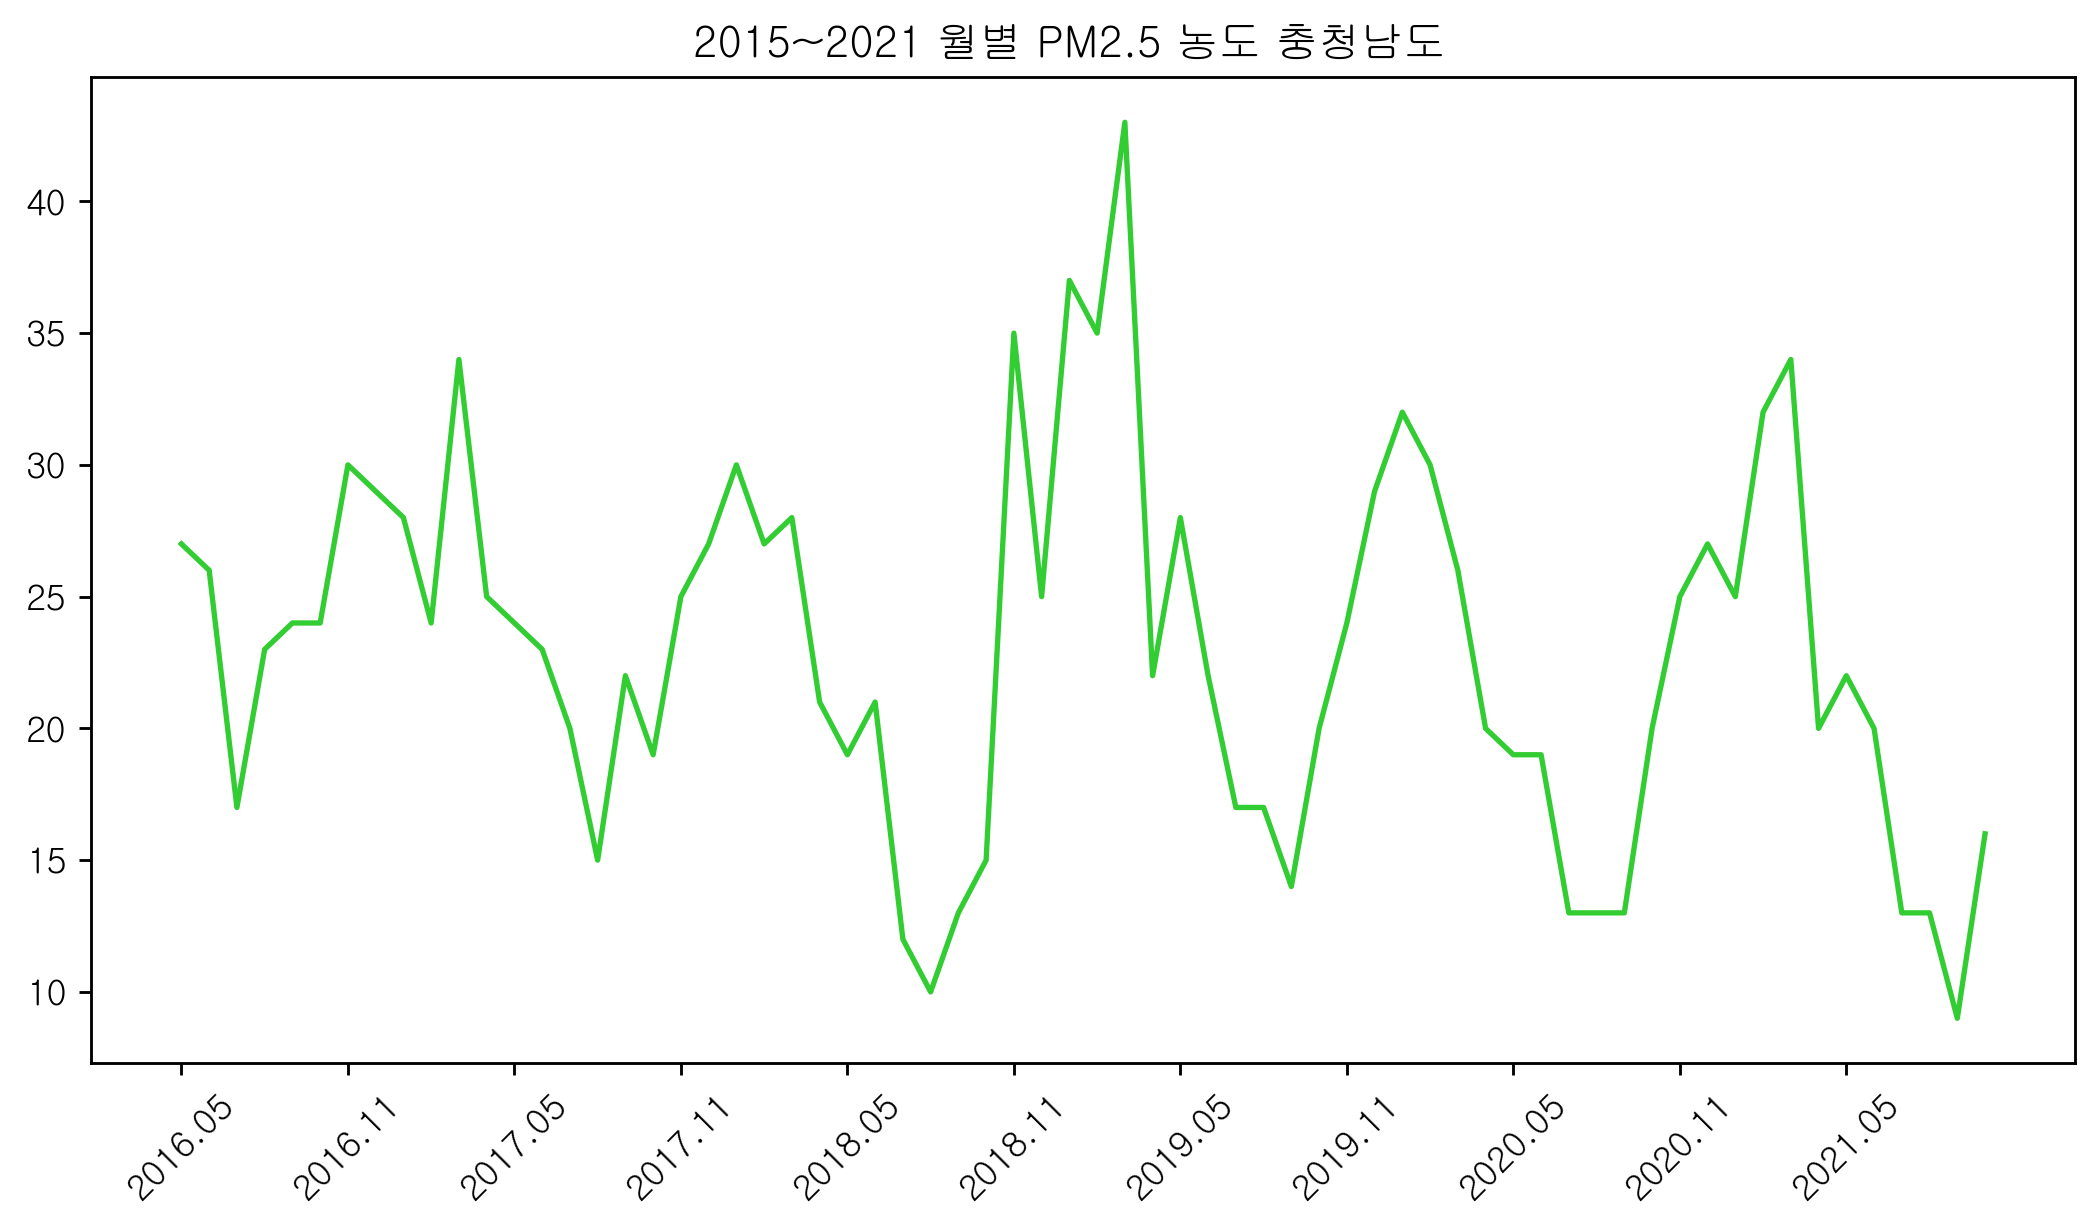

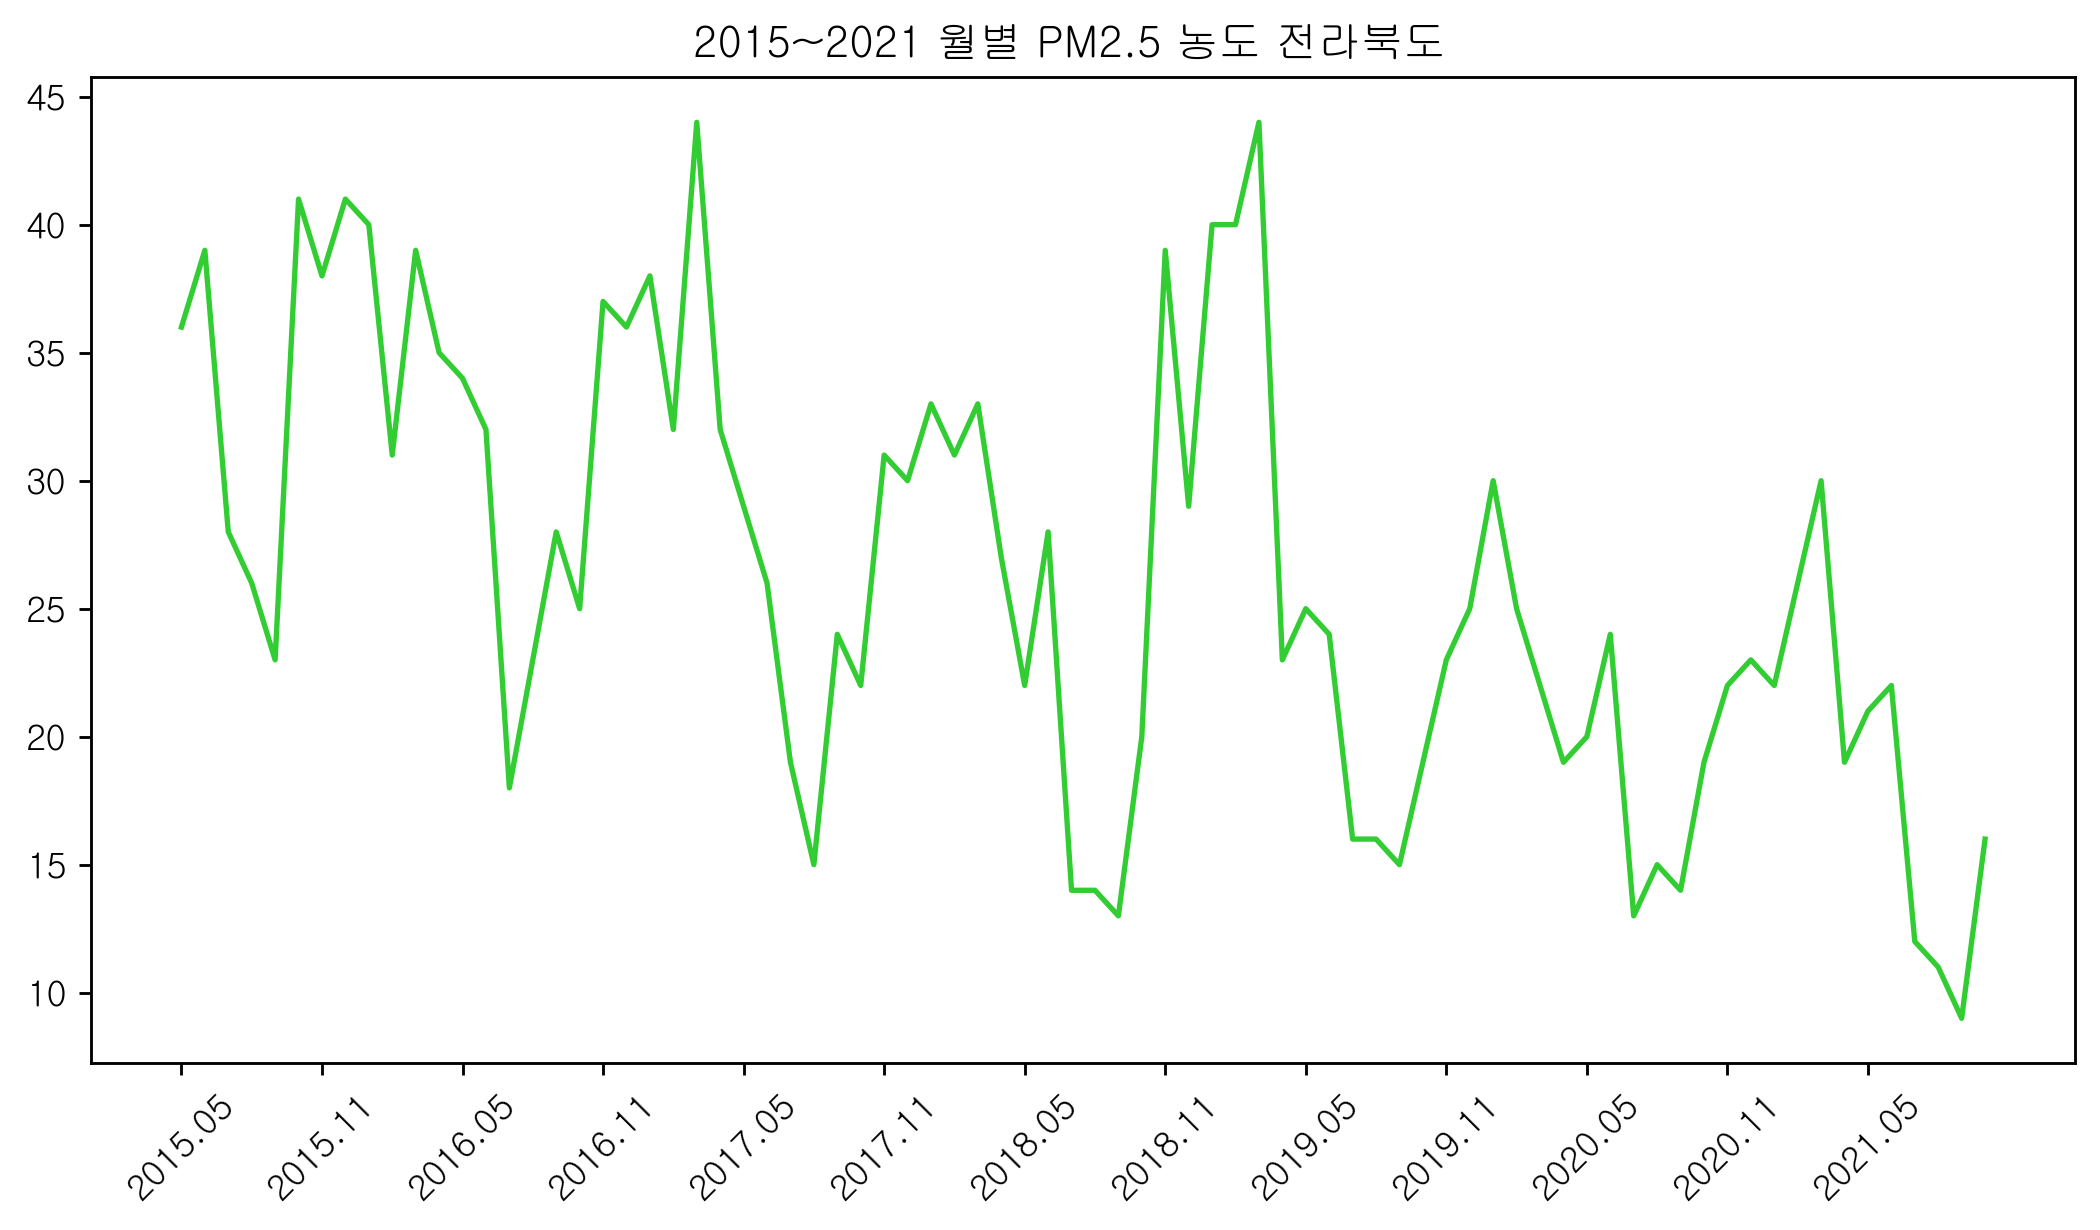

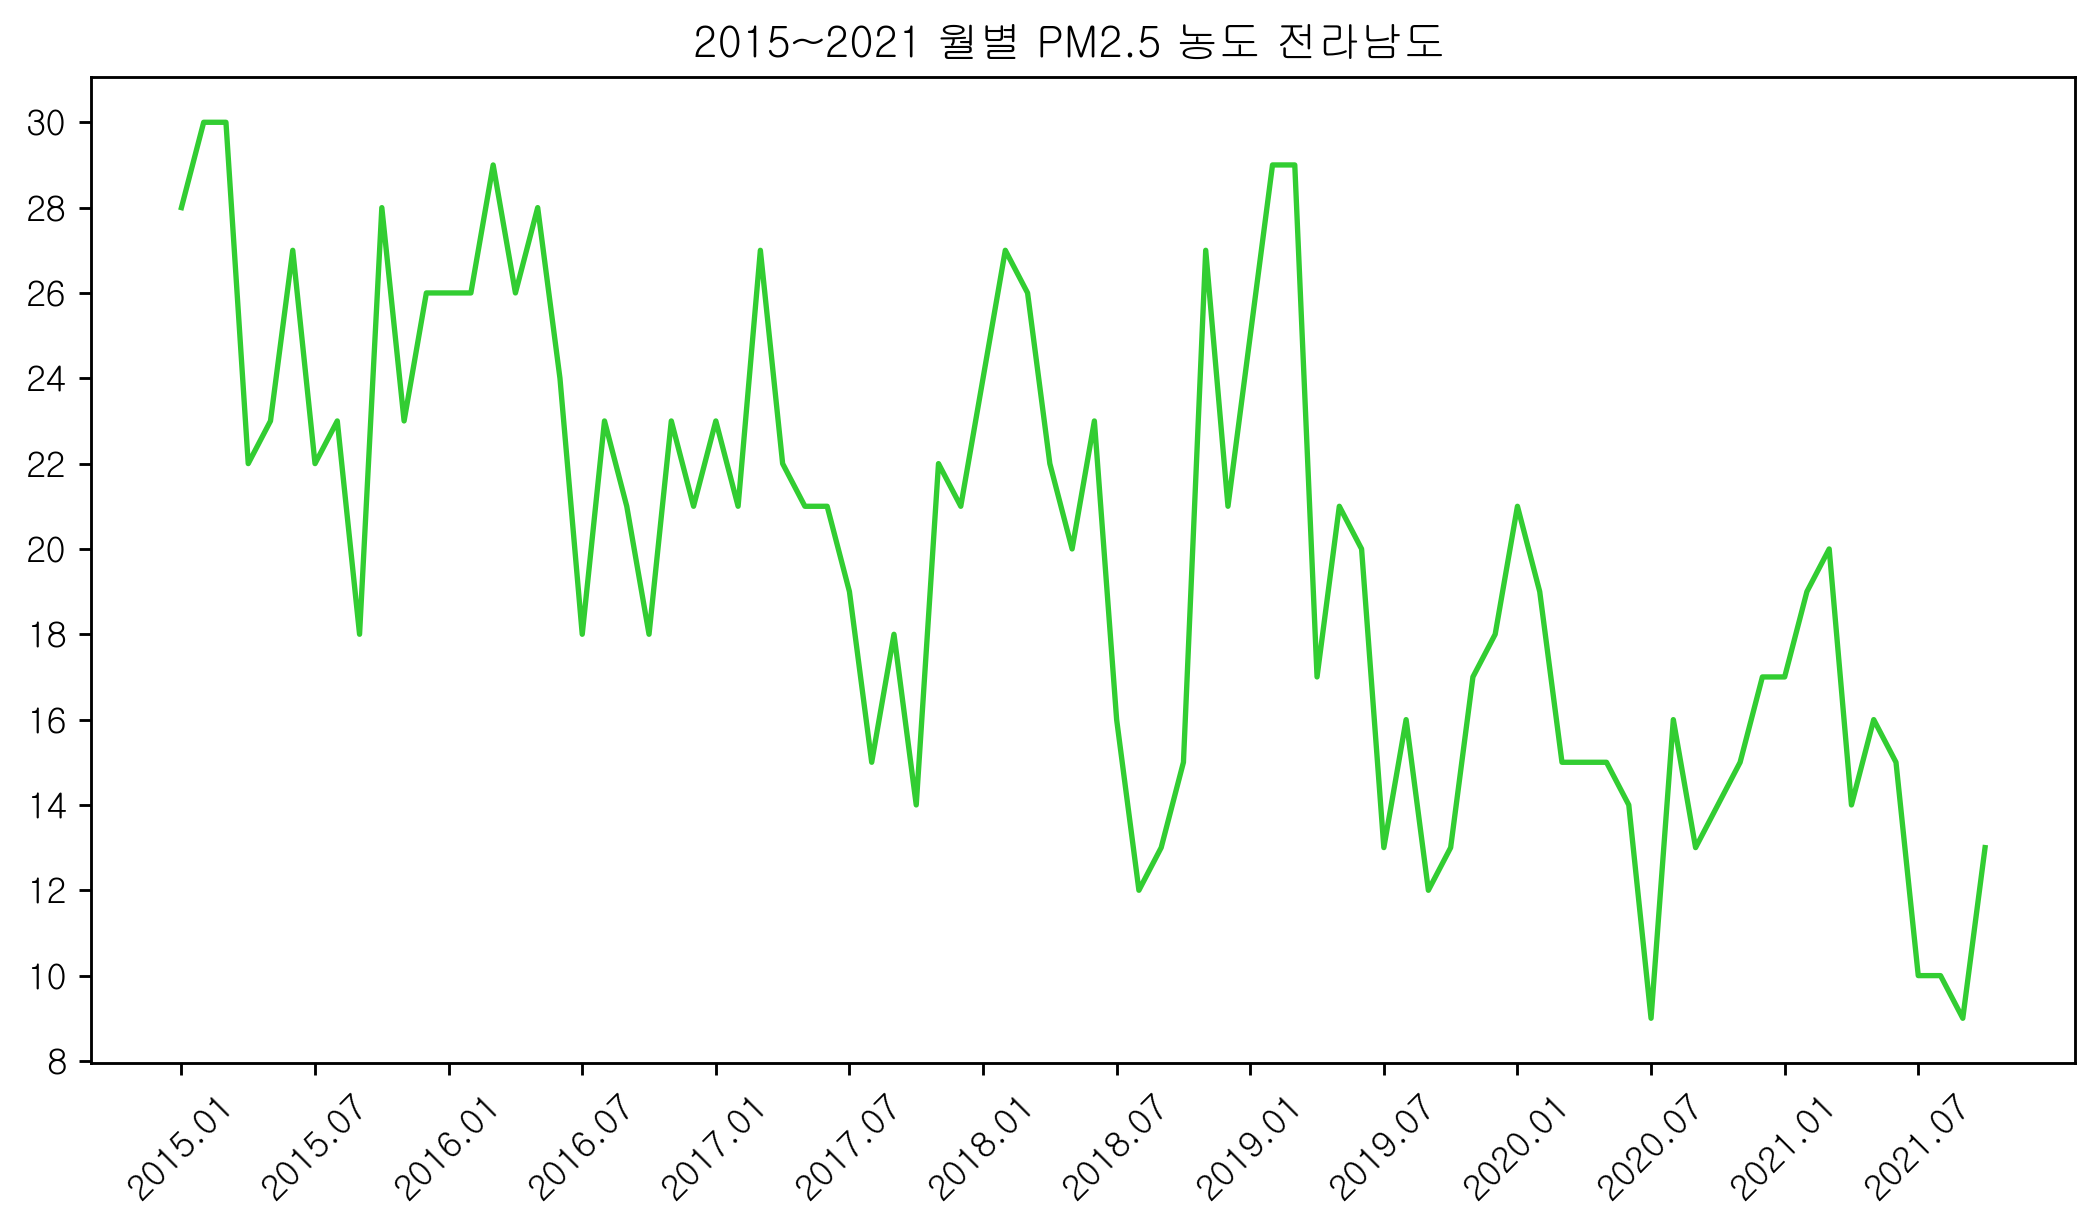

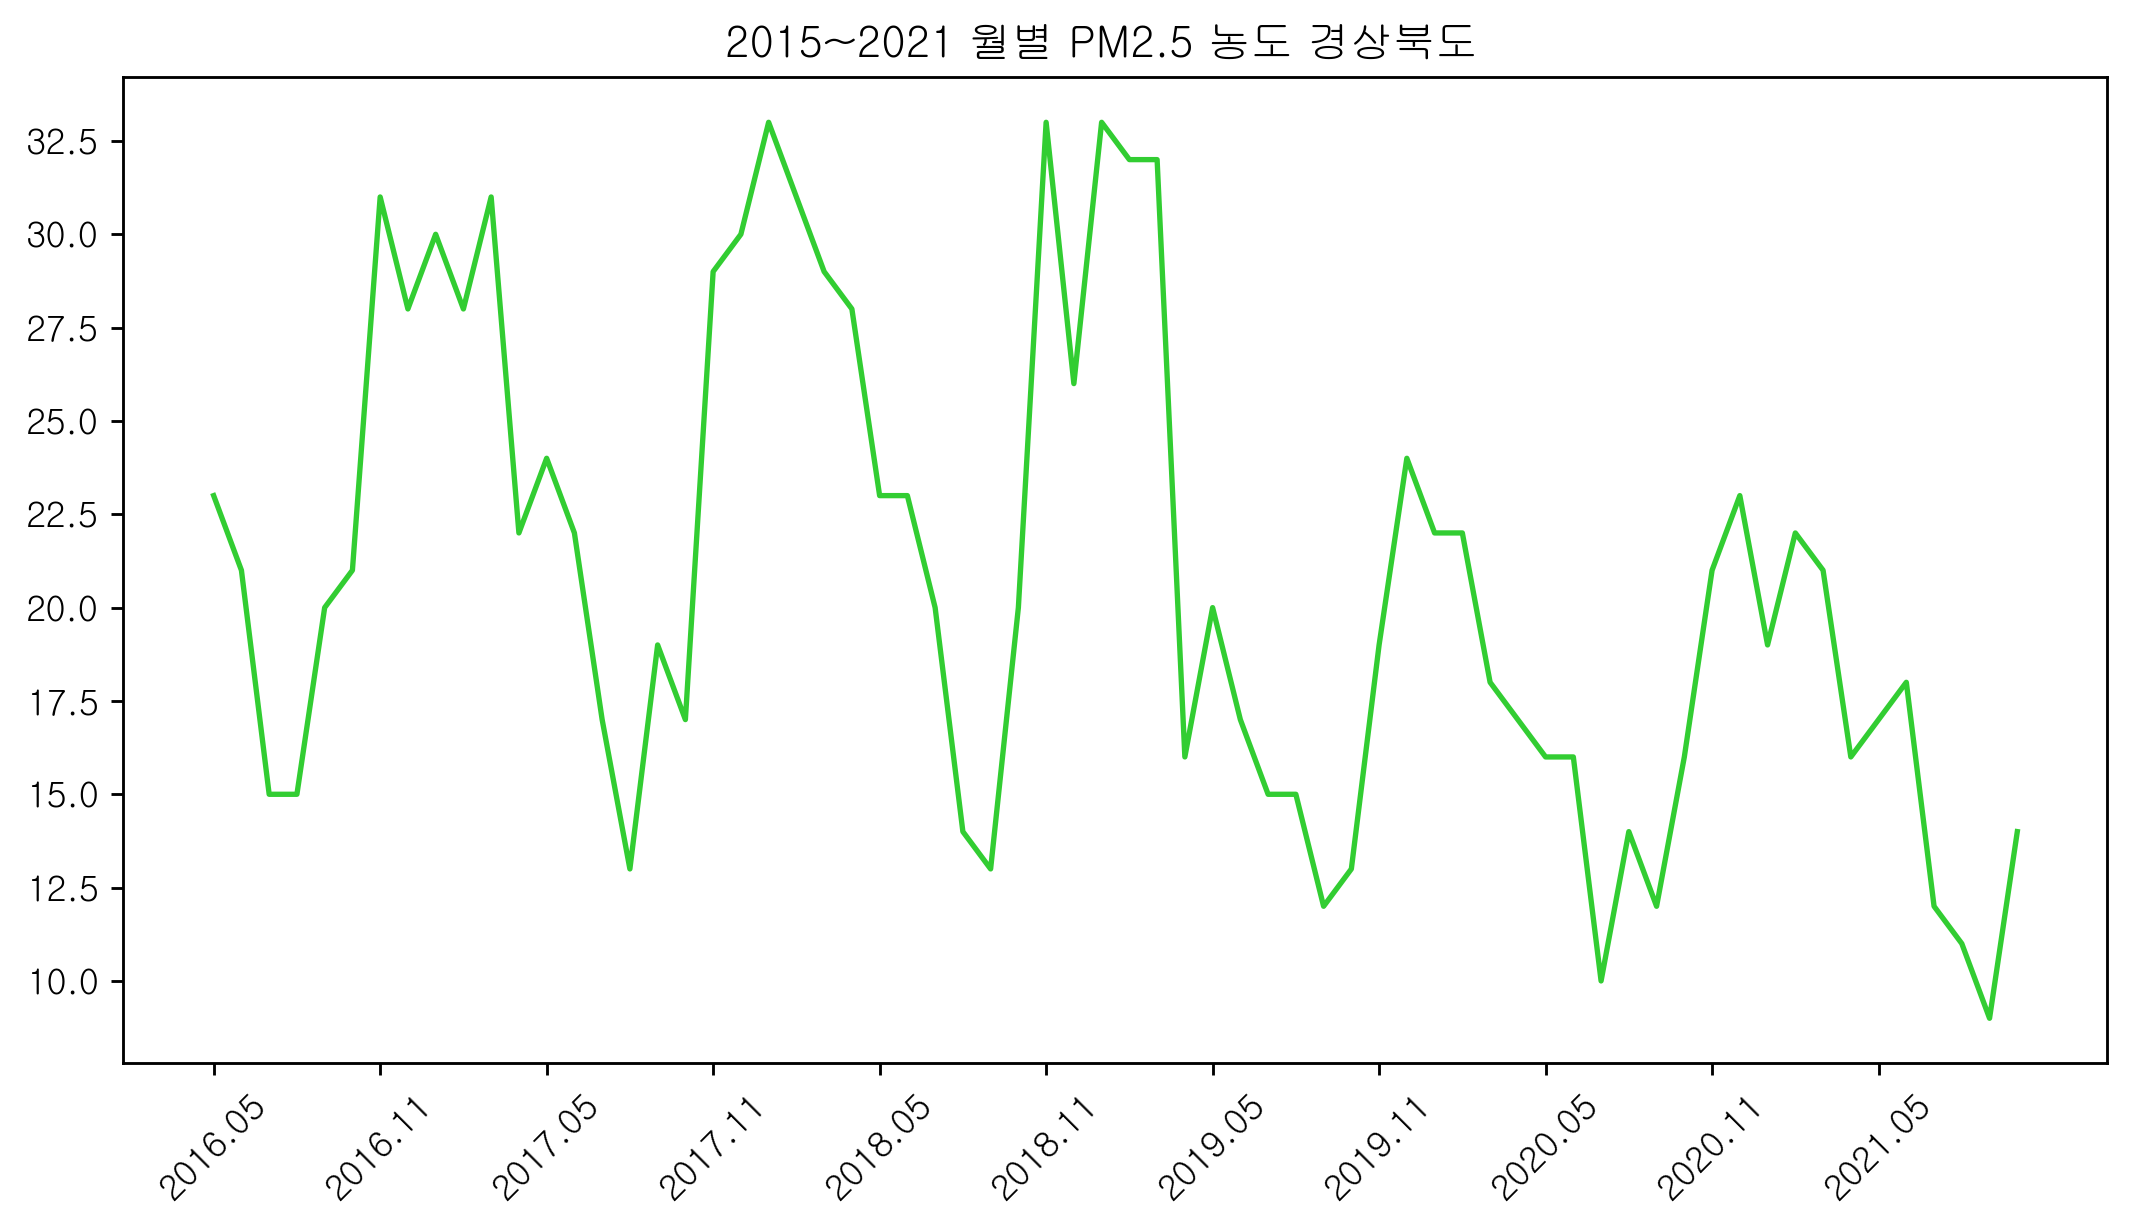

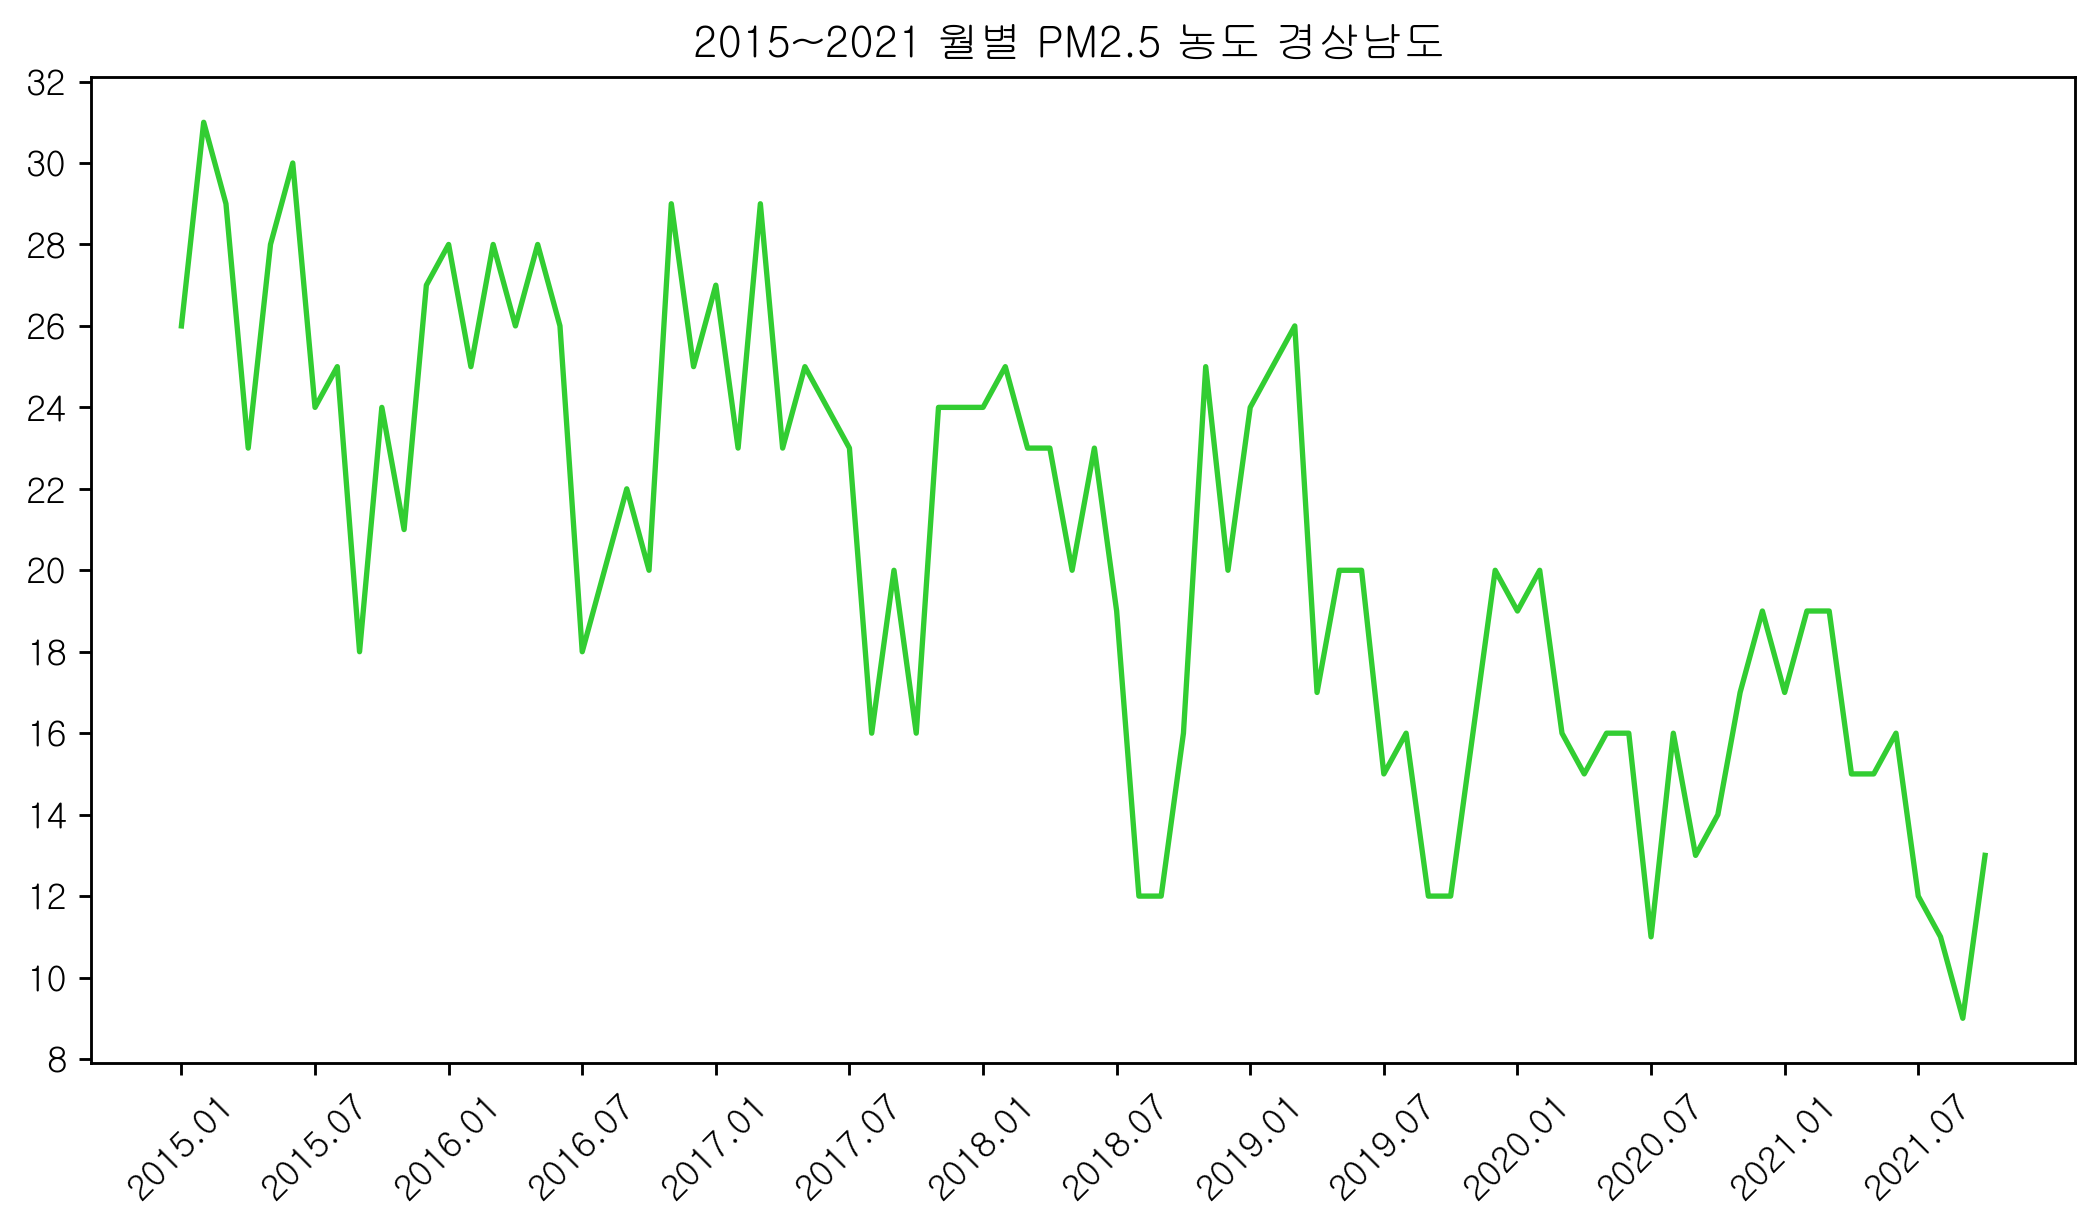

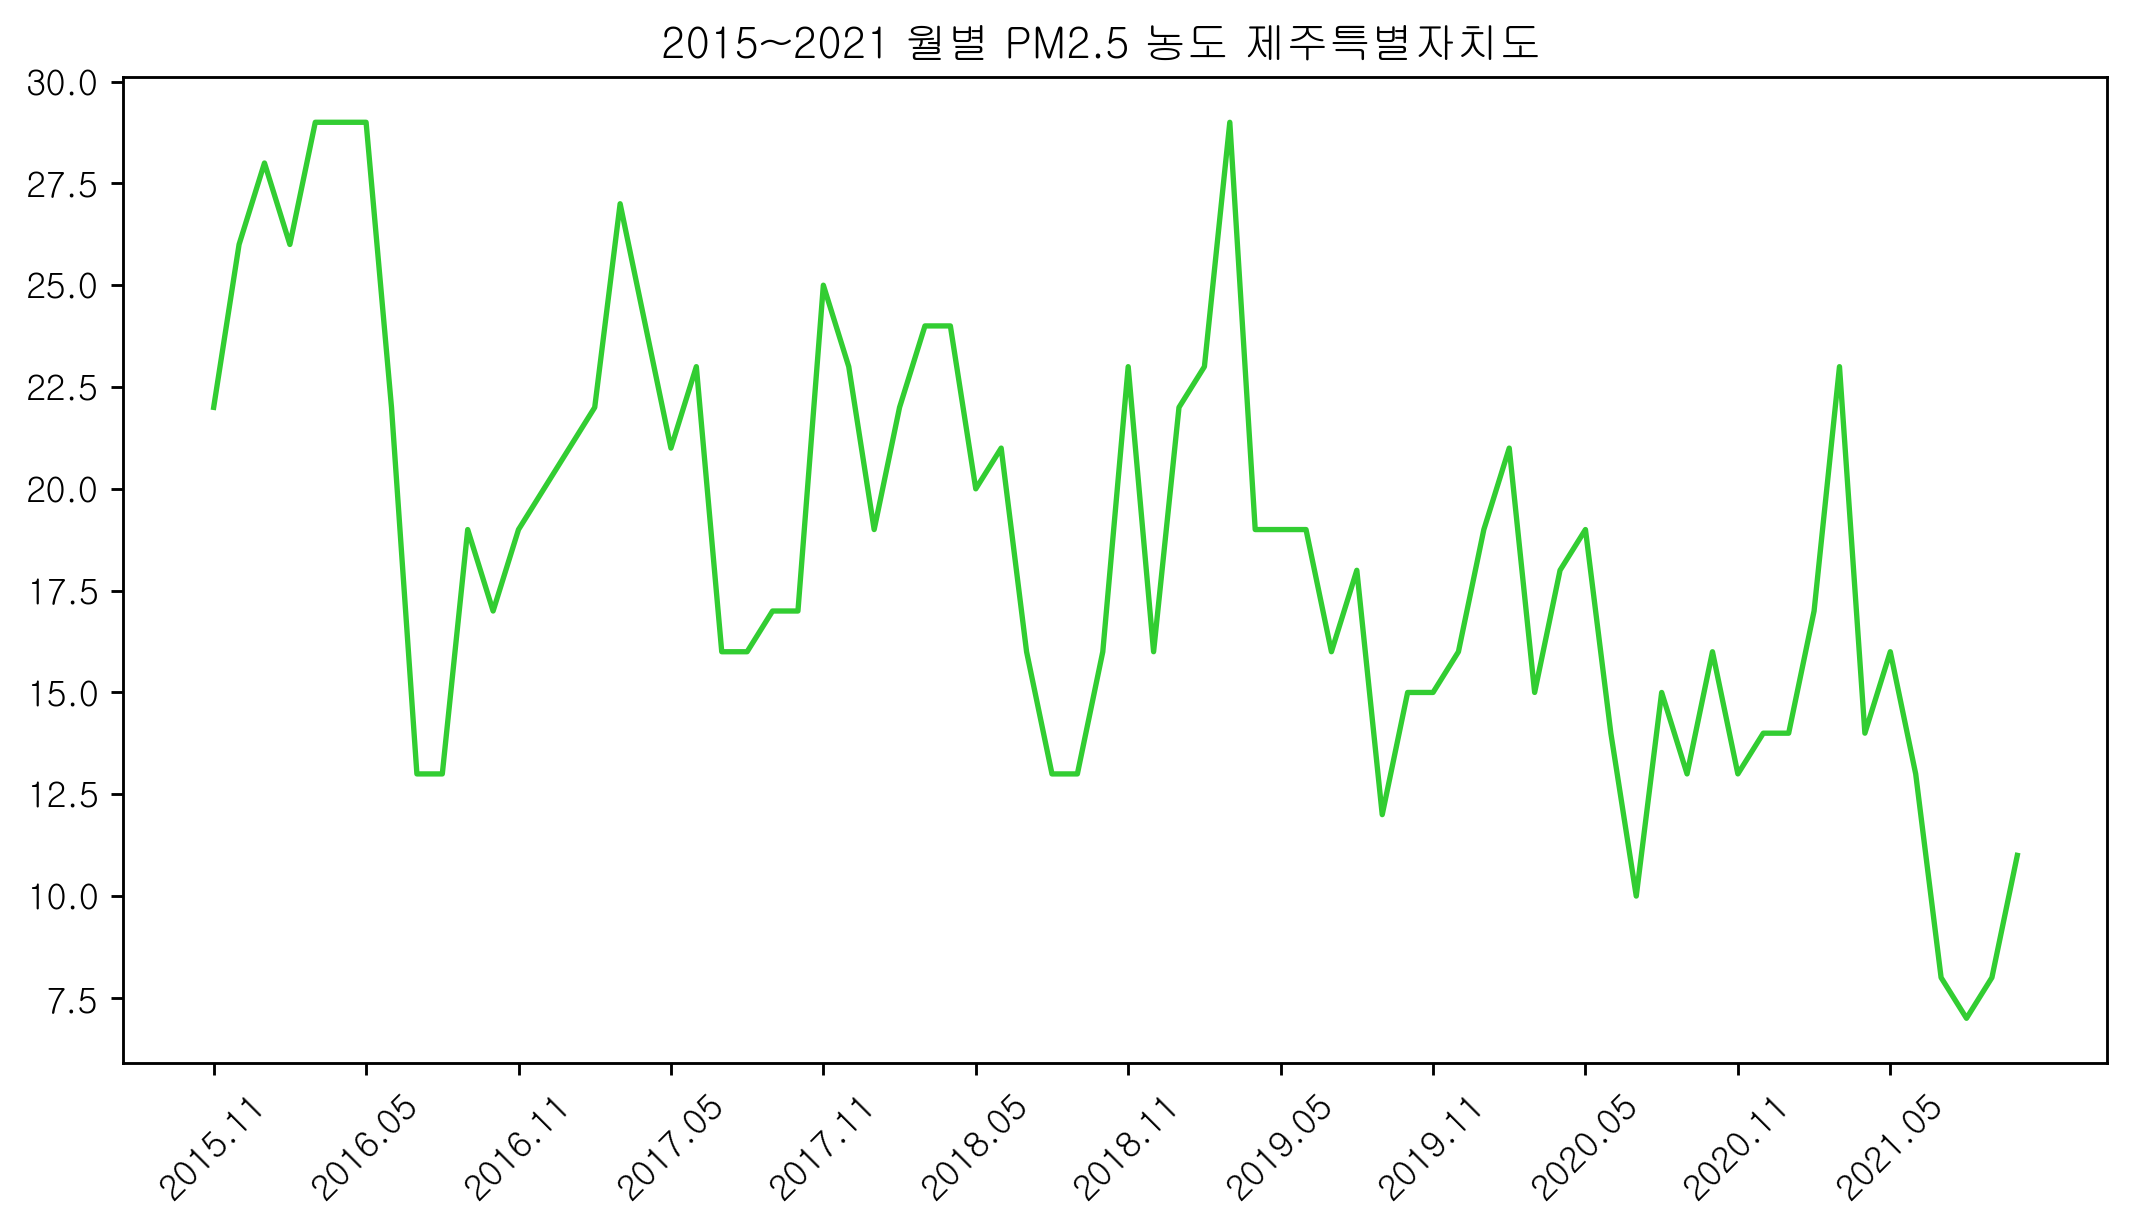

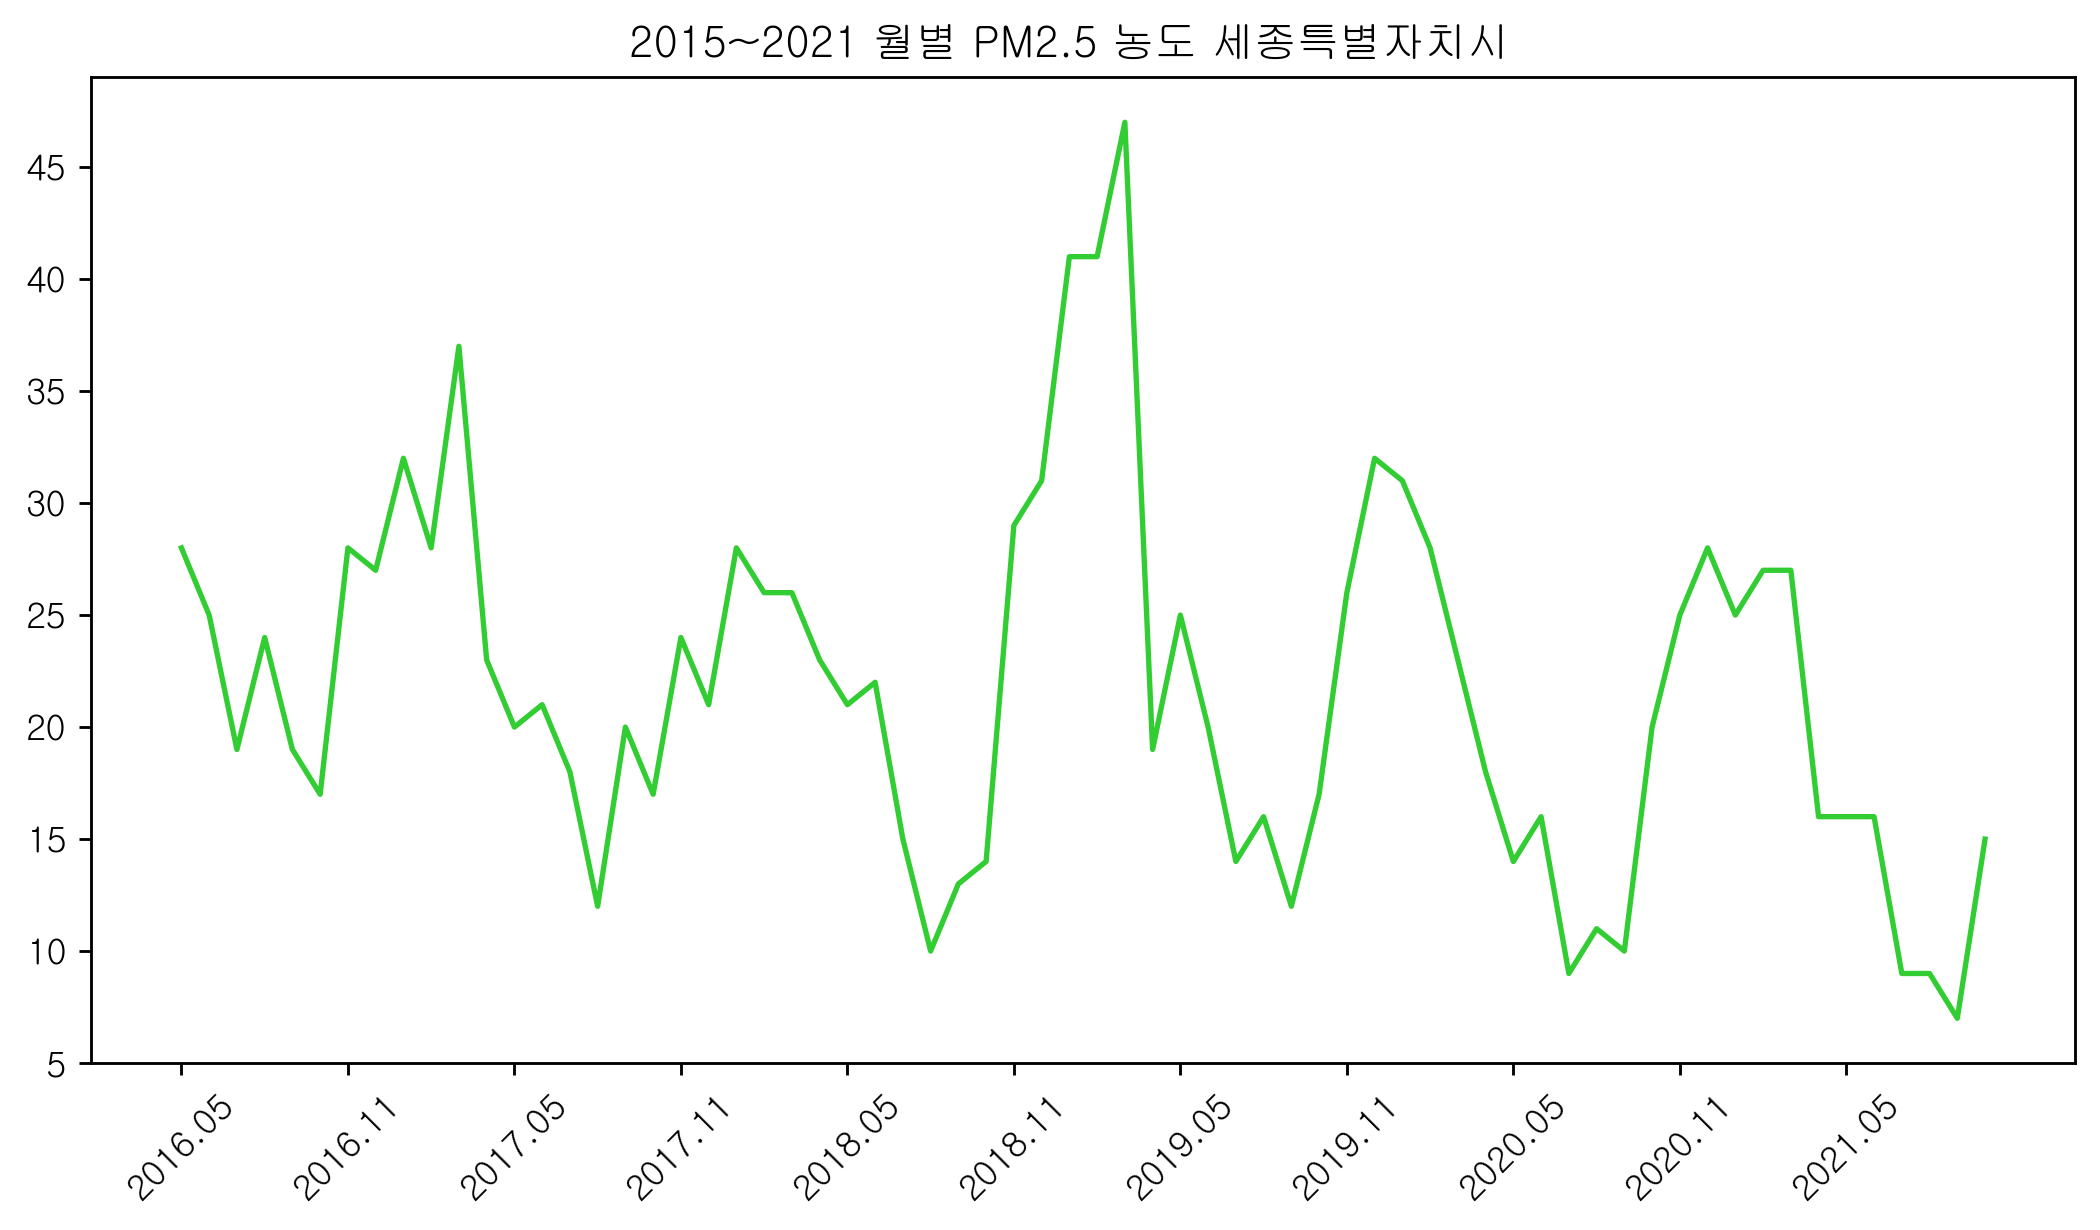

In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from PIL import Image
import imageio
import os
df = pd.read_csv("m10.csv", encoding='cp949')
df.drop_duplicates(['구분(1)'], keep = False)
df_lo = df["구분(1)"]
df_lo = df_lo.drop_duplicates()
#df_lo #.shape
lo_list=df_lo.tolist()
lo_list
lo = 0
C = 1
def all(lo):
    for lo in lo_list:
        print(lo)
        #encoding='cp949'를 넣어 한국어가 깨지지 않게 csv 파일 불러오기 
        df = pd.read_csv("m2.5.csv", encoding='cp949')
        #"도평균" 컬럼 삭제
        df = df.drop(['구분(2)'], axis=1) 
        #컬럼 이름 알기 쉽게 변경
        df.columns = ['time','location','PM2.5'] 
        #20xx.1 뒤에 0이 없는 것을 소수점 뒤 2자리까지 표시
        #빈 자리는 0으로 채우는 방식으로 20xx.1을 20xx.10으로 변경
        df['time'] = df['time'].apply(lambda x: '{:.2f}'.format(x))
        #확인
        #df.dtypes
        #특수문자 제거(*)
        df["PM2.5"] = df["PM2.5"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
        df.rename(index=lambda x: "{}".format(x+1))
        #확인
        #print(df.iloc[440])
        #저장
        #df.to_csv("s.csv", mode='w', encoding='cp949')
        #서울시(특정시)만 뽑아내기
        df_s = df[df['location'].str.contains(lo)]
        #pm2.5타입을 object에서 int32로 변경
        df_s = df_s.astype({'PM2.5':'int32'})
        pd.to_numeric(df_s['time'], errors='coerce')
        #인덱스 값 변경(작동안됨)
        #df_s.rename(index=lambda x: "{}".format(x+1))
        #data type 확인
        print(df_s) #자동화 여기까진 ok
        df_s = df_s.fillna(0)
        # 그래프 그리기
        plt.figure(figsize=(10,5), dpi = 256)
        xs = df_s['time'].to_list()
        ys = df_s['PM2.5'].to_list()
        plt.plot(xs, ys, color = "limegreen")
        plt.xticks(ticks=xs, labels=xs, rotation=45)
        #그래프 크기 지정
        #x축 y축 표시될 숫자 편집
        plt.locator_params(axis='x', nbins=len(xs)/6)
        plt.locator_params(axis='y', nbins=len(ys)/6)
        #제목
        plt.title(f"2015~2021 월별 PM2.5 농도 {lo}  ")
        #그래프 출력
        # plt.savefig(f"2015~2021 월별 PM2.5 농도 {lo}.jpg", dpi = 100)
        # plt.show()

all(lo)

